TASK 1: build the basic Linear Regression from 
the model to predict mobile UPDRS and total UPDRS based on 60% training and 40% test. Report MAE, MSE, RMSE, NRMSE,
r2, and adjusted-r2.

In [15]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#TASK 1: build the basic Linear Regression from 
#the model to predict mobile UPDRS and total UPDRS based on 60% training and 40% test. Report MAE, MSE, RMSE, NRMSE,
# r2, and adjusted-r2.

# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")
print(df.head())
df.columns
df.info()
df = df[['subject#', 'age', 'sex', 'test_time', 
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe','motor_updrs','total_updrs']]
X= df.iloc[:,:-2]

   subject#  age  sex  test_time  motor_updrs  total_updrs  jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  shimmer(apq3)  \
0     0.000034      0.00401       0.00317  ...         0.230        0.01438   
1     0.000017      0.00132       0.00150  ...         0.179        0.00994   
2     0.000025      0.00205       0.00208  ...         0.181        0.00734   
3     0.000027      0.00191       0.00264  ...         0.327        0.01106   
4     0.000020      0.00093       0.00130  ...         0.176        0.00679   

   shimmer(apq5)  shimmer(apq11)  shimmer(dda)       nhr     hnr     rpde  \
0        

Building a model by considering only motor_updrs as a dependant variable

In [34]:
Y_mupdrs = df.iloc[:,-2]
X.head()
Y_mupdrs.head()
import sklearn
X_train,X_test,Y_train_m,Y_test_m = sklearn.model_selection.train_test_split(X,Y_mupdrs,test_size=0.4,random_state=0)
print(X_train.shape)
print(Y_train_m.shape)
print(X_test.shape)
print(Y_test_m.shape)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
Y_pred_m = model.predict(X_test)
print(Y_pred_m,Y_test_m)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_m, Y_pred_m)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_m, Y_pred_m)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_m, Y_pred_m))
# Normalised Root Mean Square Error
y_max = Y_mupdrs.max()
y_min = Y_mupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_m, Y_pred_m)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

(3525, 20)
(3525,)
(2350, 20)
(2350,)
Intercept:  25.900001917166147
Coefficient:  [ 1.69519080e-01  2.01725261e-01 -2.32139302e+00  1.39272711e-02
  1.25457443e+02 -4.41725806e+04 -5.66739932e+04 -2.03518304e+02
  1.90663851e+04  6.01884363e+01 -4.66000904e-01  2.37826138e+04
 -6.23909903e+01  4.57069851e+01 -7.96832478e+03 -2.00917426e+01
 -2.79394718e-01  9.45517231e-01 -2.85628483e+01  1.56855412e+01]
[23.13278479 26.91443739 18.71541257 ... 17.30402375 22.83343007
 22.04742857] 5588    29.635
4802    36.153
3060    12.664
4228    19.168
5796    21.988
         ...  
4164    19.417
457     18.298
358     28.720
441     12.338
1640    18.742
Name: motor_updrs, Length: 2350, dtype: float64
MLP performance:
MAE:  5.958658772134279
MSE:  50.95146020492776
RMSE:  7.138029154110241
RMSE (Normalised):  0.2070596419289781
R^2:  0.2165450462536248
Adjusted R^2 0.21386839796614143


In [26]:
"""
COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL for Motor Updrs 
VS.
A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION
"""

# Compute mean of values in (y) training set
Y_base_m = np.mean(Y_train_m)

# Replicate the mean values as many times as there are values in the test set
Y_predbase_m = [Y_base_m] * len(Y_test_m)


# Show the predicted values of (y) next to the actual values of (y)
df_base_pred = pd.DataFrame({"Actual": Y_test_m, "Predicted": Y_predbase_m})
print(df_base_pred)

# Compute standard performance metrics of the baseline model:

# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_m, Y_predbase_m)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_m, Y_predbase_m)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_m, Y_predbase_m))

# Normalised Root Mean Square Error
y_max = Y_mupdrs.max()
y_min = Y_mupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_m, Y_predbase_m)

print("Baseline performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)


      Actual  Predicted
5588  29.635  21.319671
4802  36.153  21.319671
3060  12.664  21.319671
4228  19.168  21.319671
5796  21.988  21.319671
...      ...        ...
4164  19.417  21.319671
457   18.298  21.319671
358   28.720  21.319671
441   12.338  21.319671
1640  18.742  21.319671

[2350 rows x 2 columns]
Baseline performance:
MAE:  6.9018040505688845
MSE:  65.03775458794435
RMSE:  8.064598848544442
RMSE (Normalised):  0.23393753567382414
R^2:  -5.281119574318538e-05


Building a model by considering total_updrs as a dependant variable

In [36]:
Y_tupdrs = df.iloc[:,-1]
import sklearn
X_train,X_test,Y_train_t,Y_test_t = sklearn.model_selection.train_test_split(X,Y_tupdrs,test_size=0.4,random_state=0)
print(X_train.shape)
print(Y_train_t.shape)
print(X_test.shape)
print(Y_test_t.shape)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
Y_pred_t = model.predict(X_test)
print(Y_pred_t,Y_test_t)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_t, Y_pred_t)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_t, Y_pred_t)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_t, Y_pred_t))
# Normalised Root Mean Square Error
y_max = Y_tupdrs.max()
y_min = Y_tupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_t, Y_pred_t)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)


(3525, 20)
(3525,)
(2350, 20)
(2350,)
Intercept:  33.17528119258776
Coefficient:  [ 2.53189016e-01  3.16546795e-01 -4.60752598e+00  2.02369727e-02
 -3.04891482e+02 -3.55196829e+04 -6.67153875e+04 -1.50284097e+02
  2.26476507e+04  1.98911523e+00  1.32720898e+00  1.36911375e+04
  4.95226927e+01  1.86977519e+01 -4.61867741e+03 -2.86981554e+01
 -4.09996214e-01  3.76249354e+00 -3.88530211e+01  1.68179420e+01]
[30.52844954 37.45310061 24.63617309 ... 23.37529727 31.58850577
 29.49971332] 5588    37.635
4802    54.153
3060    26.443
4228    23.237
5796    32.988
         ...  
4164    29.476
457     27.298
358     36.402
441     18.007
1640    26.345
Name: total_updrs, Length: 2350, dtype: float64
MLP performance:
MAE:  7.448431500440258
MSE:  83.78146426408117
RMSE:  9.153221523817784
RMSE (Normalised):  0.19072390239660328
R^2:  0.24960610816785422
Adjusted R^2 0.24704241191970888


In [37]:
"""
COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL for Total Updrs 
VS.
A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION
"""

# Compute mean of values in (y) training set
Y_base_t = np.mean(Y_train_t)

# Replicate the mean values as many times as there are values in the test set
Y_predbase_t = [Y_base_t] * len(Y_test_t)


# Show the predicted values of (y) next to the actual values of (y)
df_basepred_t = pd.DataFrame({"Actual": Y_test_t, "Predicted": Y_predbase_t})
print(df_basepred_t)

# Compute standard performance metrics of the baseline model:
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_t, Y_predbase_t)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_t, Y_predbase_t)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_t, Y_predbase_t))

# Normalised Root Mean Square Error
y_max = Y_tupdrs.max()
y_min = Y_tupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_t, Y_predbase_t)

print("Baseline performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)

      Actual  Predicted
5588  37.635  29.017882
4802  54.153  29.017882
3060  26.443  29.017882
4228  23.237  29.017882
5796  32.988  29.017882
...      ...        ...
4164  29.476  29.017882
457   27.298  29.017882
358   36.402  29.017882
441   18.007  29.017882
1640  26.345  29.017882

[2350 rows x 2 columns]
Baseline performance:
MAE:  8.539218742344953
MSE:  111.64998868772797
RMSE:  10.566455824339965
RMSE (Normalised):  0.22017119153900577
R^2:  -6.290553788979025e-08


## Task 2:
analyse the performance of the linear regression made in Task 1 on various split scenarios:
1) 50% train: 50% test
2) 60%:40%
3) 70%:30%
4) 80%:20%

 

1. 50% Train : 50% Test

Prediciting Motor_UPDRS for 50%-50%

In [4]:
import sklearn
X_train,X_test,Y_train_m,Y_test_m = sklearn.model_selection.train_test_split(X,Y_mupdrs,test_size=0.5,random_state=0)
print(X_train.shape)
print(Y_train_m.shape)
print(X_test.shape)
print(Y_test_m.shape)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_m = model.predict(X_test)
print(y_pred_m,Y_test_m)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_m, y_pred_m)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_m, y_pred_m)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_m, y_pred_m))
# Normalised Root Mean Square Error
y_max = Y_mupdrs.max()
y_min = Y_mupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_m, y_pred_m)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)


(2937, 20)
(2937,)
(2938, 20)
(2938,)
Intercept:  25.83464007059586
Coefficient:  [ 1.80110399e-01  2.00848684e-01 -2.21953864e+00  1.39502701e-02
  1.04280988e+02 -4.03724199e+04 -4.12939997e+04 -1.26824033e+02
  1.39150319e+04  5.29286895e+01  6.94291460e-03  8.35905149e+04
 -7.35853633e+01  4.51405921e+01 -2.78960772e+04 -2.18803531e+01
 -2.58413076e-01  7.01566004e-01 -2.95059485e+01  1.59066908e+01]
[23.28729404 26.81493239 18.52280766 ... 27.57962104 25.11999902
 24.68820915] 5588    29.635
4802    36.153
3060    12.664
4228    19.168
5796    21.988
         ...  
4027    23.667
3814    31.238
3373    30.335
4401    24.543
4711    35.725
Name: motor_updrs, Length: 2938, dtype: float64
MLP performance:
MAE:  5.990455244268075
MSE:  51.233467596405056
RMSE:  7.157755765350272
RMSE (Normalised):  0.2076318706172682
R^2:  0.21324803855822227
Adjusted R^2 0.21056012615151987


Predicting Total_UPDRS for 50%-50%

In [24]:
import sklearn
X_train,X_test,Y_train_t,Y_test_t = sklearn.model_selection.train_test_split(X,Y_tupdrs,test_size=0.5,random_state=0)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_t = model.predict(X_test)
print(y_pred_t,Y_test_t)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_t, y_pred_t)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_t, y_pred_t)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_t, y_pred_t))
# Normalised Root Mean Square Error
y_max = Y_tupdrs.max()
y_min = Y_tupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_t, y_pred_t)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)


2. 60%-40% - checked for this in 1st task


3) 70% - 30%

Prediciting Motor_UPDRS at 70%-30%

In [5]:
import sklearn
X_train,X_test,Y_train_m,Y_test_m = sklearn.model_selection.train_test_split(X,Y_mupdrs,test_size=0.3,random_state=0)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_m = model.predict(X_test)
print(y_pred_m,Y_test_m)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_m, y_pred_m)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_m, y_pred_m)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_m, y_pred_m))
# Normalised Root Mean Square Error
y_max = Y_mupdrs.max()
y_min = Y_mupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_m, y_pred_m)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

Intercept:  26.94241202162505
Coefficient:  [ 1.73180393e-01  1.99307011e-01 -2.36812263e+00  1.36576950e-02
  1.87228658e+02 -5.04889385e+04 -6.09384316e+04 -3.25453112e+02
  2.05007726e+04  5.88042199e+01 -9.94709621e-01  2.28688181e+04
 -2.59110181e+01  4.14776032e+01 -7.67081644e+03 -2.00786330e+01
 -3.21969969e-01 -2.09942368e-01 -2.74732462e+01  1.58872235e+01]
[23.25532063 27.28846703 18.8013533  ... 22.16146352 26.77238556
 15.0206979 ] 5588    29.6350
4802    36.1530
3060    12.6640
4228    19.1680
5796    21.9880
         ...   
5567    33.2040
325     26.3760
2262     8.3171
1115    20.8710
1855     6.5651
Name: motor_updrs, Length: 1763, dtype: float64
MLP performance:
MAE:  5.972057063085327
MSE:  51.069073884192306
RMSE:  7.146262931364358
RMSE (Normalised):  0.20729848698454623
R^2:  0.214129938011684
Adjusted R^2 0.21144503858569041


Predicting Total_UPDRS at 70%-30%

In [6]:
import sklearn
X_train,X_test,Y_train_t,Y_test_t = sklearn.model_selection.train_test_split(X,Y_tupdrs,test_size=0.3,random_state=0)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_t = model.predict(X_test)
print(y_pred_t,Y_test_t)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_t, y_pred_t)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_t, y_pred_t)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_t, y_pred_t))
# Normalised Root Mean Square Error
y_max = Y_tupdrs.max()
y_min = Y_tupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_t, y_pred_t)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

Intercept:  [35.08539405]
Coefficient:  [[ 2.57147469e-01  3.17418684e-01 -4.69407874e+00  1.94120882e-02
  -2.45572167e+02 -4.09360406e+04 -6.10412182e+04 -2.78119971e+02
   2.07683723e+04  8.53895060e+00  7.29977117e-01  1.61629707e+04
   9.04270412e+01  8.61431101e+00 -5.45409927e+03 -2.83619848e+01
  -4.76863866e-01  2.16658224e+00 -3.77452537e+01  1.60699605e+01]]
[[30.72133263]
 [37.86015403]
 [24.66014716]
 ...
 [30.71825415]
 [35.18692712]
 [19.05969278]]       total_updrs
5588       37.635
4802       54.153
3060       26.443
4228       23.237
5796       32.988
...           ...
5567       41.204
325        30.627
2262       18.951
1115       26.871
1855       10.646

[1763 rows x 1 columns]
MLP performance:
MAE:  7.4047664779391456
MSE:  82.68905386921301
RMSE:  9.09335217998363
RMSE (Normalised):  total_updrs    0.189476
dtype: float64
R^2:  0.25009187048517567
Adjusted R^2 0.2475298338281383


4) 80% Train : 20% Test

Predicting Motor_UPDRS at 80%-20%

In [7]:
import sklearn
X_train,X_test,Y_train_m,Y_test_m = sklearn.model_selection.train_test_split(X,Y_mupdrs,test_size=0.2,random_state=0)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_m = model.predict(X_test)
print(y_pred_m,Y_test_m)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_m, y_pred_m)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_m, y_pred_m)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_m, y_pred_m))
# Normalised Root Mean Square Error
y_max = Y_mupdrs.max()
y_min = Y_mupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_m, y_pred_m)
Adj_r2 = 1 - (1-r_2) * (len(Y_mupdrs)-1)/(len(Y_mupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

Intercept:  26.917895129128265
Coefficient:  [ 1.74829074e-01  2.02126410e-01 -2.41193370e+00  1.27319796e-02
  1.38677158e+02 -5.10355729e+04 -5.10879193e+04 -2.95074796e+02
  1.72329441e+04  5.79666475e+01 -8.35686542e-01  5.85858630e+03
 -1.68925114e+01  4.00657747e+01 -2.00470707e+03 -1.98496051e+01
 -3.29589884e-01  2.32037006e-02 -2.72803197e+01  1.56430893e+01]
[23.38968362 27.45630065 18.76764166 ... 26.90232641 20.49385555
 18.98386424] 5588    29.635
4802    36.153
3060    12.664
4228    19.168
5796    21.988
         ...  
4698    36.550
2328    28.807
5696    34.380
862     27.729
3100    14.160
Name: motor_updrs, Length: 1175, dtype: float64
MLP performance:
MAE:  6.011101602546747
MSE:  52.107091621307795
RMSE:  7.218524199675984
RMSE (Normalised):  0.2093946387400099
R^2:  0.20245274113356815
Adjusted R^2 0.1997279469454355


 Predicting Total_UPDRS at 80%-20%

In [36]:
import sklearn
X_train,X_test,Y_train_t,Y_test_t = sklearn.model_selection.train_test_split(X,Y_tupdrs,test_size=0.2,random_state=0)
model = sklearn.linear_model.LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, Y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred_t = model.predict(X_test)
print(y_pred_t,Y_test_t)
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test_t, y_pred_t)
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test_t, y_pred_t)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(Y_test_t, y_pred_t))
# Normalised Root Mean Square Error
y_max = Y_tupdrs.max()
y_min = Y_tupdrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(Y_test_t, y_pred_t)
Adj_r2 = 1 - (1-r_2) * (len(Y_tupdrs)-1)/(len(Y_tupdrs)-X.shape[1]-1)

print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)


## TASK 3: 
LOG TRANSFORMATION AND CO-LINEARITY 
(OPTIMISATION)

Visualizations of current relations(Scatter plots)

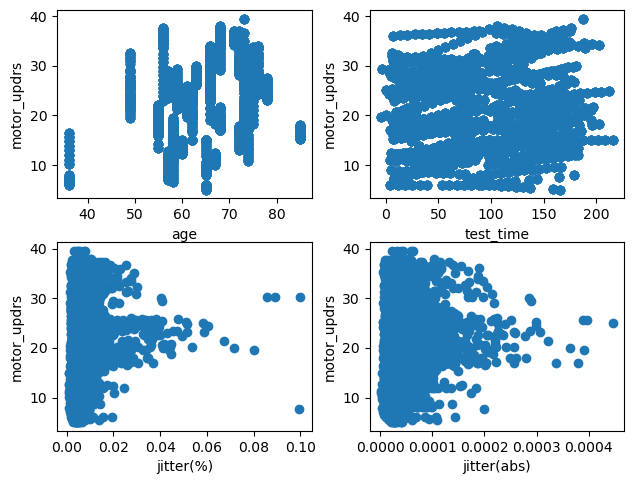

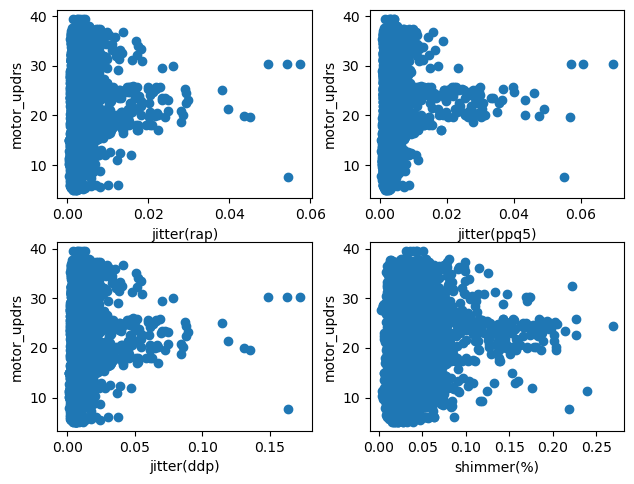

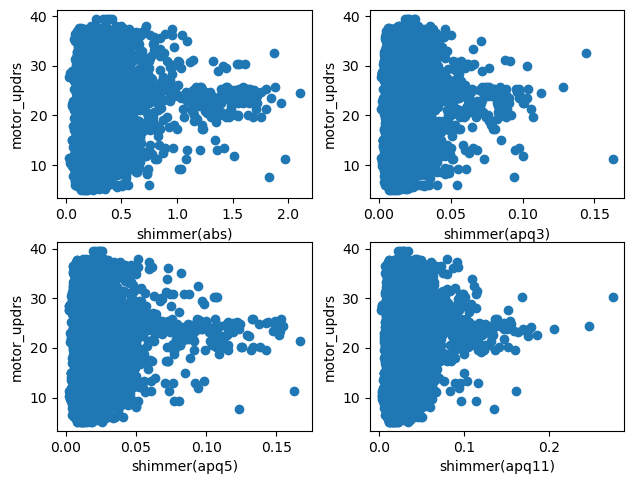

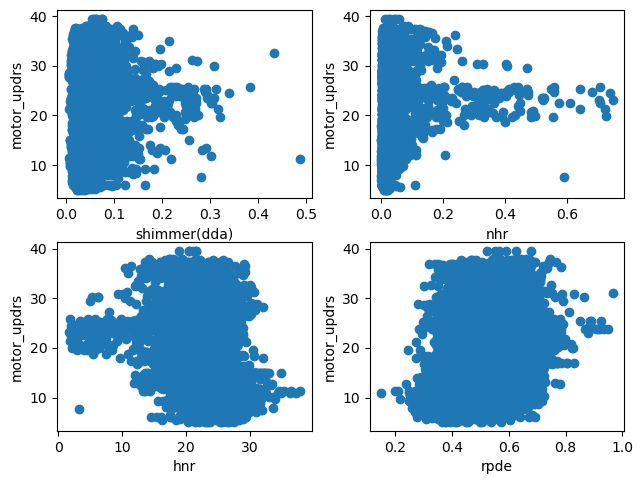

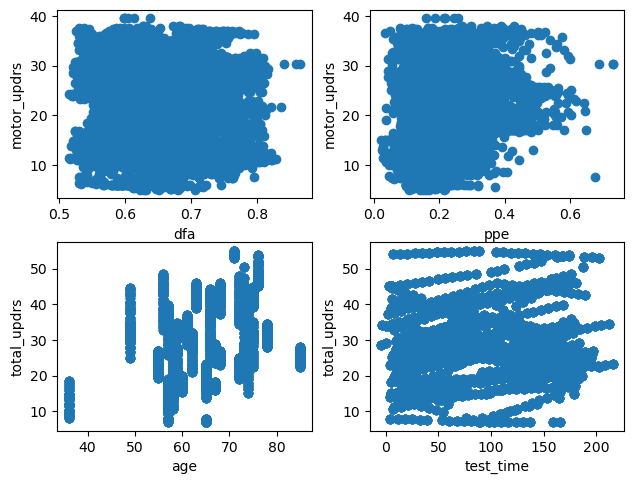

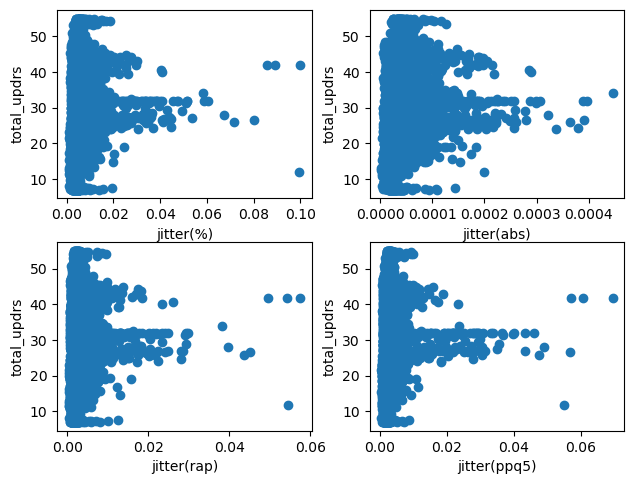

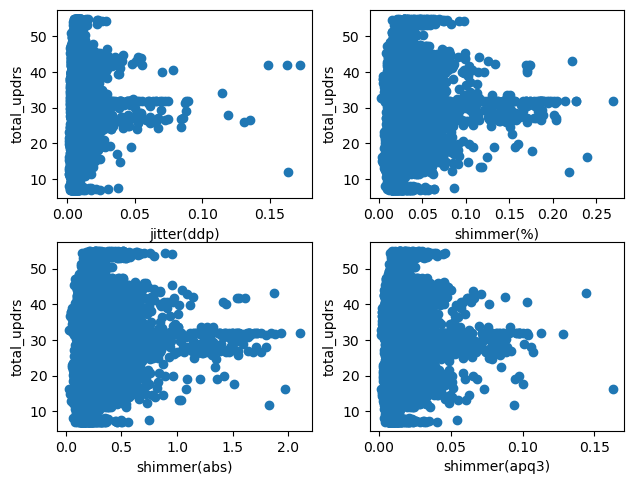

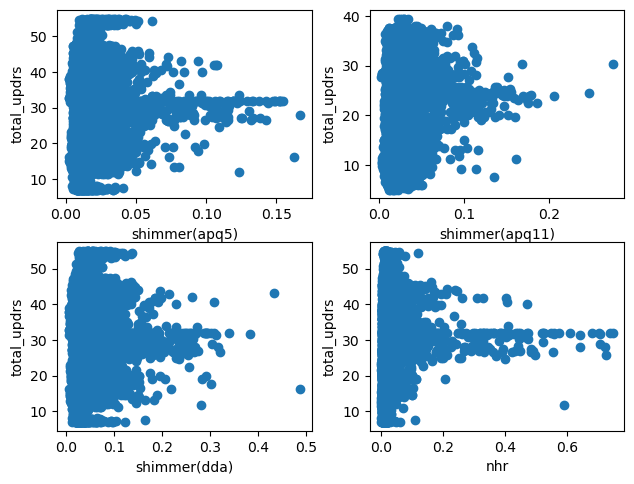

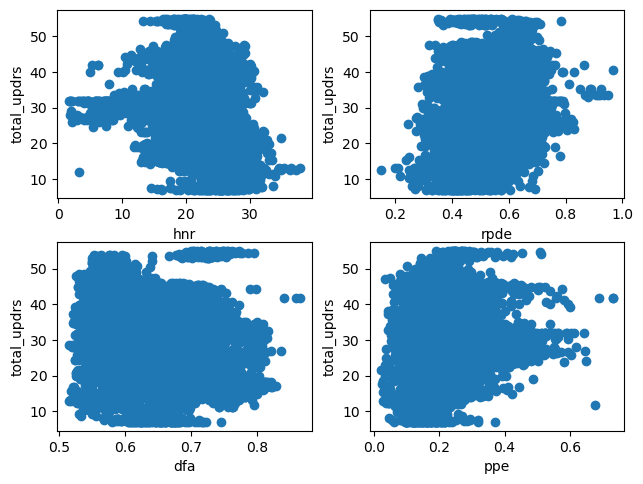

In [41]:
#visualizing linearity/non-linearity relations between explanatory variables and the response variable(firstly considering 
# motor_updrs as response variable then considering total_updrs as response variable) 

import pandas as pd
import matplotlib.pyplot as plt
# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig1.tight_layout()

""" FIGURE 1 """
ax1.scatter(x = df['age'], y = df['motor_updrs'])
ax1.set_xlabel("age")
ax1.set_ylabel("motor_updrs")

ax2.scatter(x = df['test_time'], y = df['motor_updrs'])
ax2.set_xlabel("test_time")
ax2.set_ylabel("motor_updrs")

ax3.scatter(x = df['jitter(%)'], y = df['motor_updrs'])
ax3.set_xlabel("jitter(%)")
ax3.set_ylabel("motor_updrs")

ax4.scatter(x = df['jitter(abs)'], y = df['motor_updrs'])
ax4.set_xlabel("jitter(abs)")
ax4.set_ylabel("motor_updrs")

plt.show()

fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig2.tight_layout()

""" FIGURE 2 """
ax1.scatter(x = df['jitter(rap)'], y = df['motor_updrs'])
ax1.set_xlabel("jitter(rap)")
ax1.set_ylabel("motor_updrs")

ax2.scatter(x = df['jitter(ppq5)'], y = df['motor_updrs'])
ax2.set_xlabel("jitter(ppq5)")
ax2.set_ylabel("motor_updrs")

ax3.scatter(x = df['jitter(ddp)'], y = df['motor_updrs'])
ax3.set_xlabel("jitter(ddp)")
ax3.set_ylabel("motor_updrs")

ax4.scatter(x = df['shimmer(%)'], y = df['motor_updrs'])
ax4.set_xlabel("shimmer(%)")
ax4.set_ylabel("motor_updrs")

plt.show()

fig3, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig3.tight_layout()

""" FIGURE 3 """
ax1.scatter(x = df['shimmer(abs)'], y = df['motor_updrs'])
ax1.set_xlabel("shimmer(abs)")
ax1.set_ylabel("motor_updrs")

ax2.scatter(x = df['shimmer(apq3)'], y = df['motor_updrs'])
ax2.set_xlabel("shimmer(apq3)")
ax2.set_ylabel("motor_updrs")

ax3.scatter(x = df['shimmer(apq5)'], y = df['motor_updrs'])
ax3.set_xlabel("shimmer(apq5)")
ax3.set_ylabel("motor_updrs")

ax4.scatter(x = df['shimmer(apq11)'], y = df['motor_updrs'])
ax4.set_xlabel("shimmer(apq11)")
ax4.set_ylabel("motor_updrs")

plt.show()

fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig4.tight_layout()

""" FIGURE 4 """
ax1.scatter(x = df['shimmer(dda)'], y = df['motor_updrs'])
ax1.set_xlabel("shimmer(dda)")
ax1.set_ylabel("motor_updrs")

ax2.scatter(x = df['nhr'], y = df['motor_updrs'])
ax2.set_xlabel("nhr")
ax2.set_ylabel("motor_updrs")

ax3.scatter(x = df['hnr'], y = df['motor_updrs'])
ax3.set_xlabel("hnr")
ax3.set_ylabel("motor_updrs")

ax4.scatter(x = df['rpde'], y = df['motor_updrs'])
ax4.set_xlabel("rpde")
ax4.set_ylabel("motor_updrs")

plt.show()

fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig5.tight_layout()

""" FIGURE 5 """
ax1.scatter(x = df['dfa'], y = df['motor_updrs'])
ax1.set_xlabel("dfa")
ax1.set_ylabel("motor_updrs")

ax2.scatter(x = df['ppe'], y = df['motor_updrs'])
ax2.set_xlabel("ppe")
ax2.set_ylabel("motor_updrs")

ax3.scatter(x = df['age'], y = df['total_updrs'])
ax3.set_xlabel("age")
ax3.set_ylabel("total_updrs")

ax4.scatter(x = df['test_time'], y = df['total_updrs'])
ax4.set_xlabel("test_time")
ax4.set_ylabel("total_updrs")

plt.show()

fig6, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig6.tight_layout()

""" FIGURE 6 """
ax1.scatter(x = df['jitter(%)'], y = df['total_updrs'])
ax1.set_xlabel("jitter(%)")
ax1.set_ylabel("total_updrs")

ax2.scatter(x = df['jitter(abs)'], y = df['total_updrs'])
ax2.set_xlabel("jitter(abs)")
ax2.set_ylabel("total_updrs")

ax3.scatter(x = df['jitter(rap)'], y = df['total_updrs'])
ax3.set_xlabel("jitter(rap)")
ax3.set_ylabel("total_updrs")

ax4.scatter(x = df['jitter(ppq5)'], y = df['total_updrs'])
ax4.set_xlabel("jitter(ppq5)")
ax4.set_ylabel("total_updrs")

plt.show()

fig7, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig7.tight_layout()

""" FIGURE 7 """
ax1.scatter(x = df['jitter(ddp)'], y = df['total_updrs'])
ax1.set_xlabel("jitter(ddp)")
ax1.set_ylabel("total_updrs")

ax2.scatter(x = df['shimmer(%)'], y = df['total_updrs'])
ax2.set_xlabel("shimmer(%)")
ax2.set_ylabel("total_updrs")

ax3.scatter(x = df['shimmer(abs)'], y = df['total_updrs'])
ax3.set_xlabel("shimmer(abs)")
ax3.set_ylabel("total_updrs")

ax4.scatter(x = df['shimmer(apq3)'], y = df['total_updrs'])
ax4.set_xlabel("shimmer(apq3)")
ax4.set_ylabel("total_updrs")

plt.show()

fig8, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig8.tight_layout()

""" FIGURE 8 """
ax1.scatter(x = df['shimmer(apq5)'], y = df['total_updrs'])
ax1.set_xlabel("shimmer(apq5)")
ax1.set_ylabel("total_updrs")

ax2.scatter(x = df['shimmer(apq11)'], y = df['motor_updrs'])
ax2.set_xlabel("shimmer(apq11)")
ax2.set_ylabel("total_updrs")

ax3.scatter(x = df['shimmer(dda)'], y = df['total_updrs'])
ax3.set_xlabel("shimmer(dda)")
ax3.set_ylabel("total_updrs")

ax4.scatter(x = df['nhr'], y = df['total_updrs'])
ax4.set_xlabel("nhr")
ax4.set_ylabel("total_updrs")

plt.show()

fig9, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig9.tight_layout()

""" FIGURE 9 """
ax1.scatter(x = df['hnr'], y = df['total_updrs'])
ax1.set_xlabel("hnr")
ax1.set_ylabel("total_updrs")

ax2.scatter(x = df['rpde'], y = df['total_updrs'])
ax2.set_xlabel("rpde")
ax2.set_ylabel("total_updrs")

ax3.scatter(x = df['dfa'], y = df['total_updrs'])
ax3.set_xlabel("dfa")
ax3.set_ylabel("total_updrs")

ax4.scatter(x = df['ppe'], y = df['total_updrs'])
ax4.set_xlabel("ppe")
ax4.set_ylabel("total_updrs")

plt.show()

C:\Users\Ruhani Kakkar\AppData\Local\Temp\ipykernel_10872\2158567230.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df[transcolumnname] = df[column].apply(np.log)


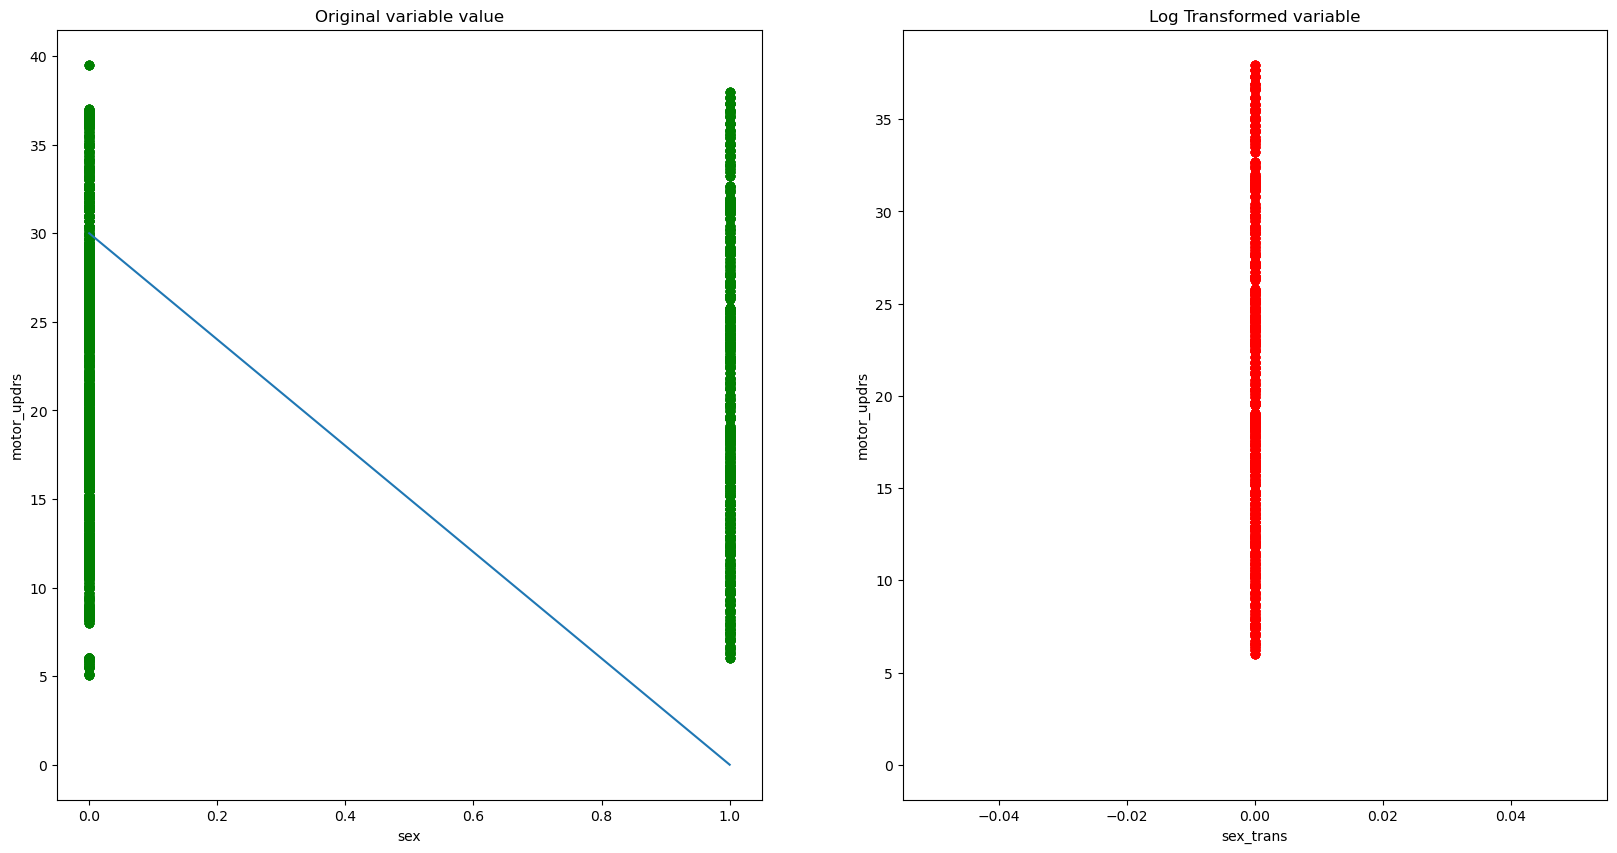

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     78.75
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.49e-271
Time:                        10:07:31   Log-Likelihood:                -19978.
No. Observations:                5875   AIC:                         4.000e+04
Df Residuals:                    5855   BIC:                         4.013e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.9449      2.387     10.

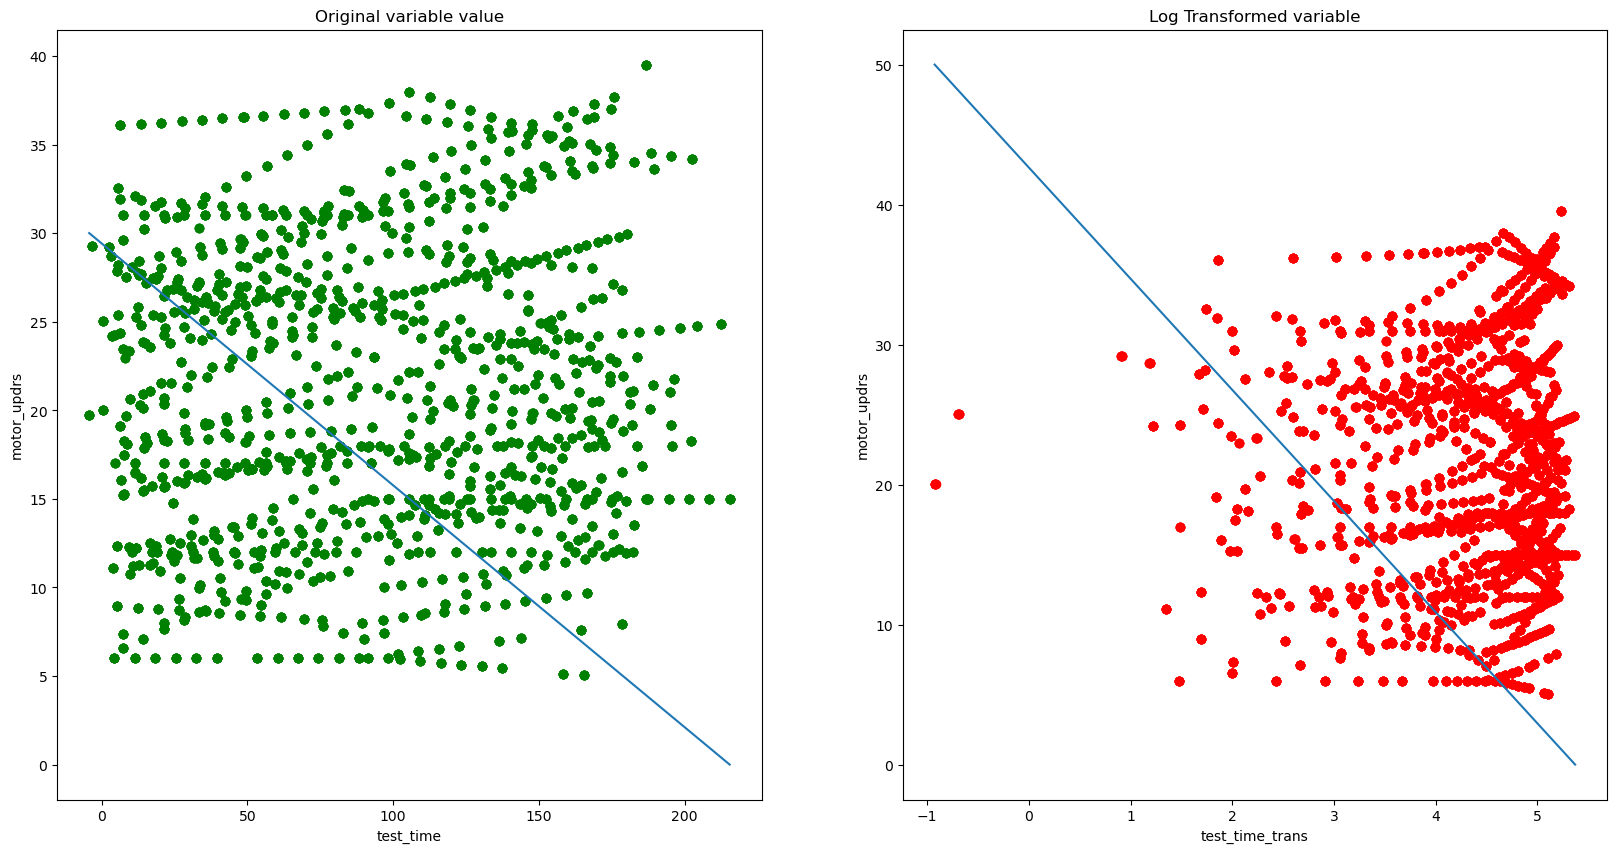

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     80.52
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.07e-264
Time:                        10:07:31   Log-Likelihood:                -19997.
No. Observations:                5875   AIC:                         4.003e+04
Df Residuals:                    5856   BIC:                         4.016e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.5026      2.393     10.

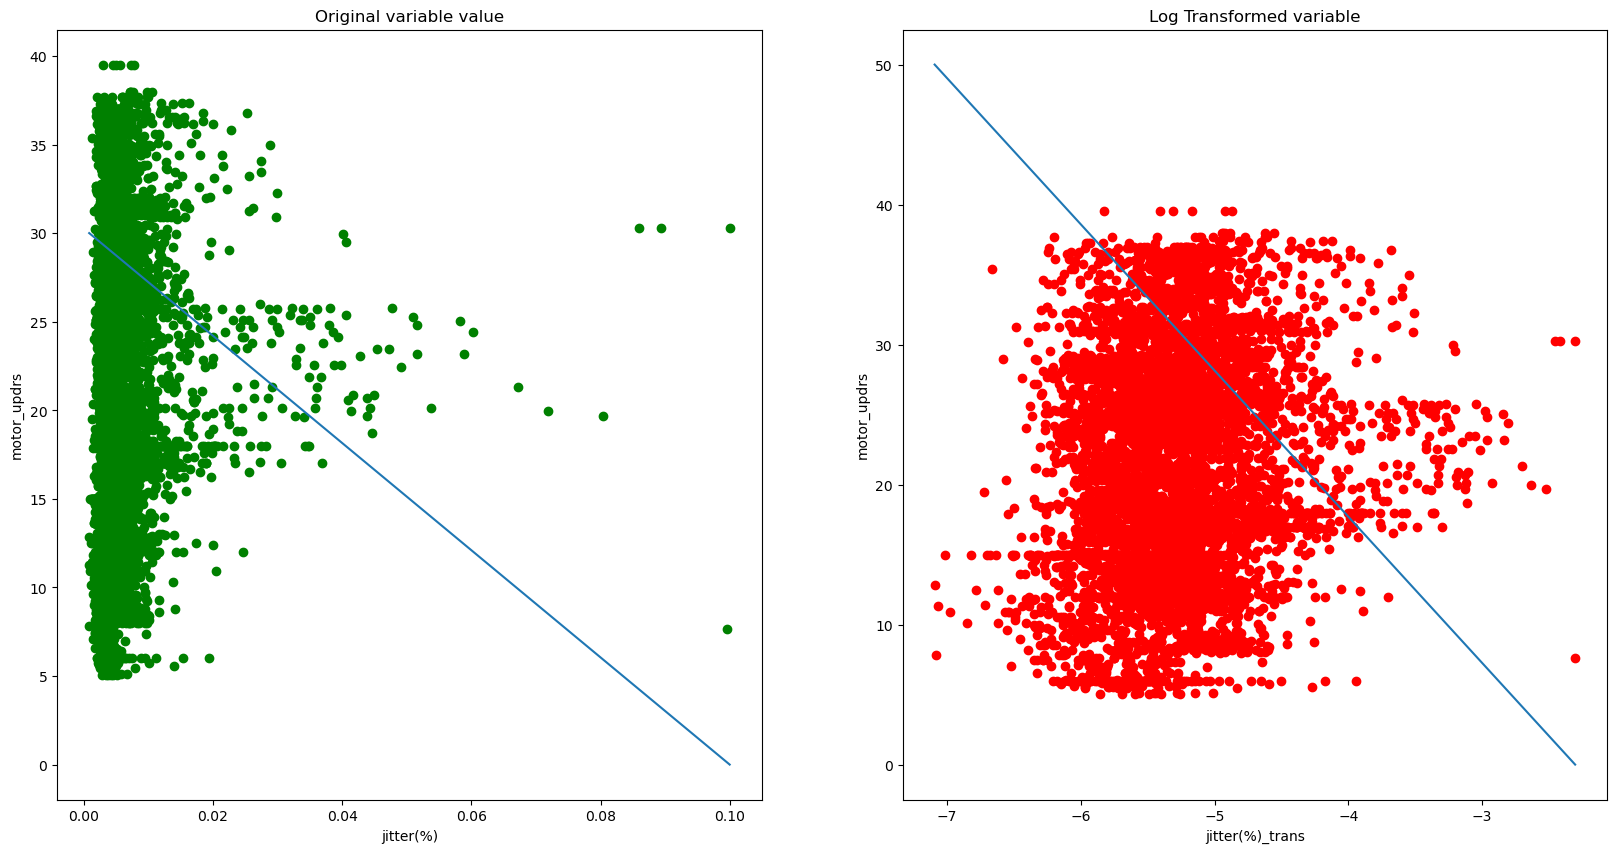

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     85.21
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.34e-265
Time:                        10:07:32   Log-Likelihood:                -19997.
No. Observations:                5875   AIC:                         4.003e+04
Df Residuals:                    5857   BIC:                         4.015e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.2862      2.381     10.

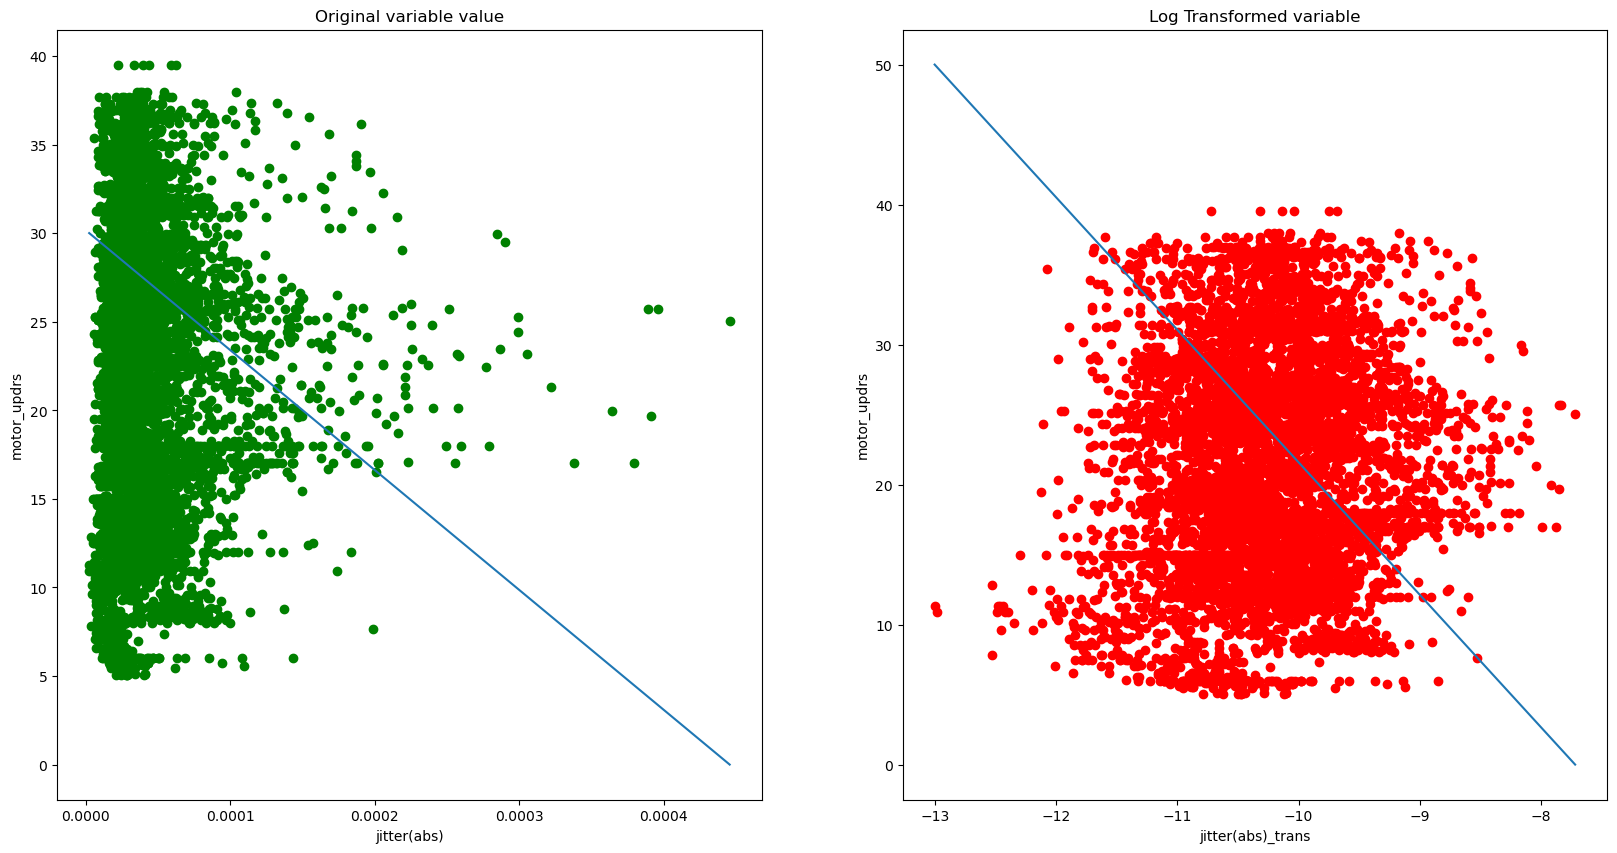

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     89.53
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.18e-263
Time:                        10:07:32   Log-Likelihood:                -20004.
No. Observations:                5875   AIC:                         4.004e+04
Df Residuals:                    5858   BIC:                         4.016e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.0198      2.335     11.

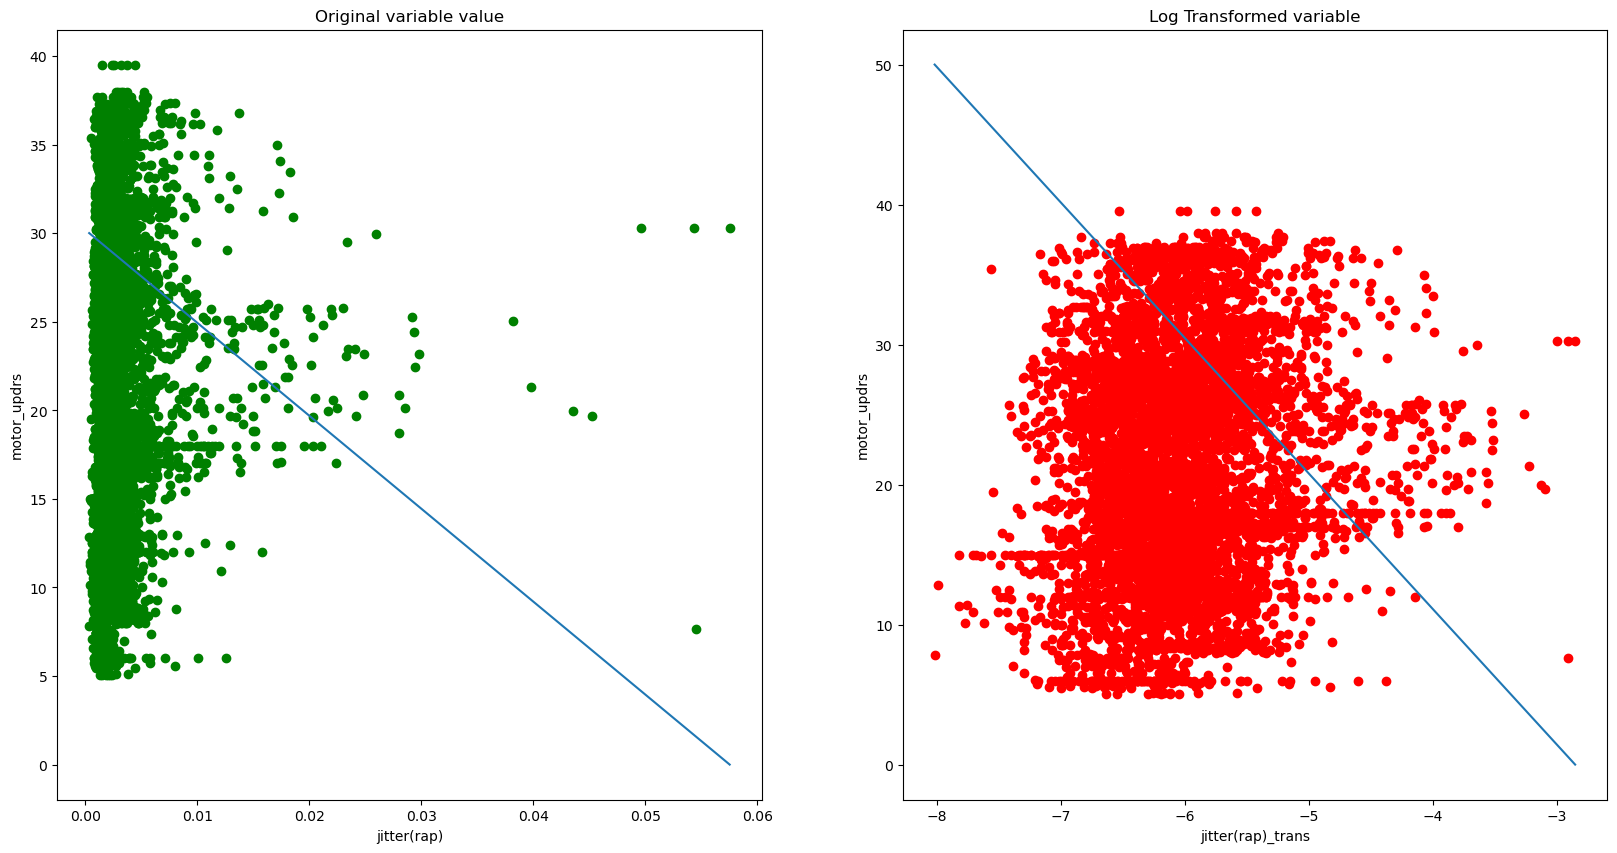

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     95.43
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          3.78e-264
Time:                        10:07:33   Log-Likelihood:                -20005.
No. Observations:                5875   AIC:                         4.004e+04
Df Residuals:                    5859   BIC:                         4.015e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.0366      2.335     11.

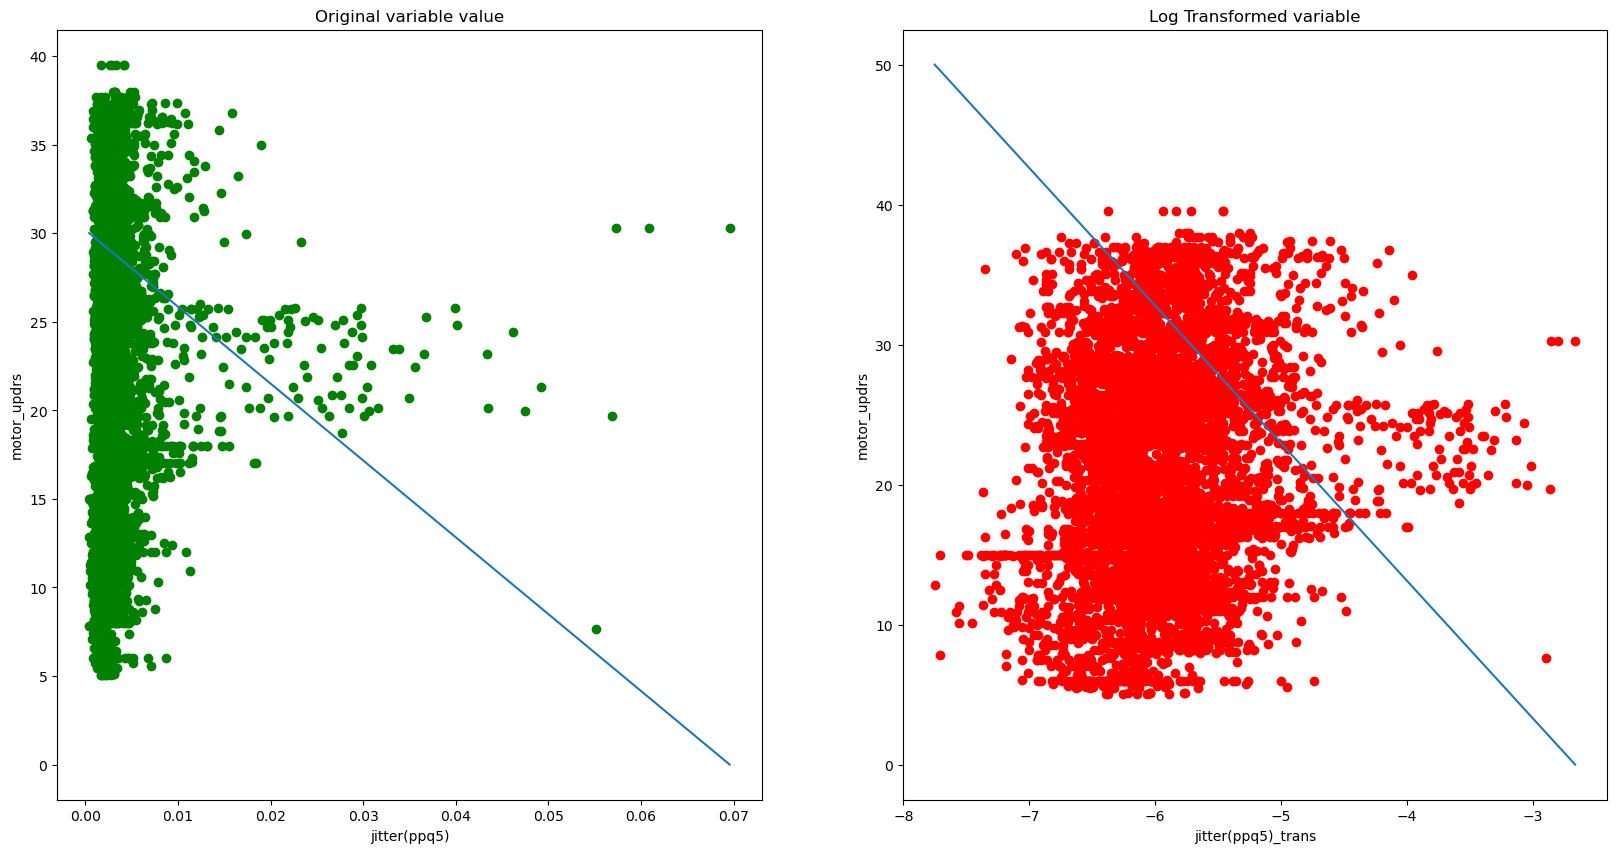

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          5.94e-265
Time:                        10:07:33   Log-Likelihood:                -20005.
No. Observations:                5875   AIC:                         4.004e+04
Df Residuals:                    5860   BIC:                         4.014e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             26.9829      2.334     11.

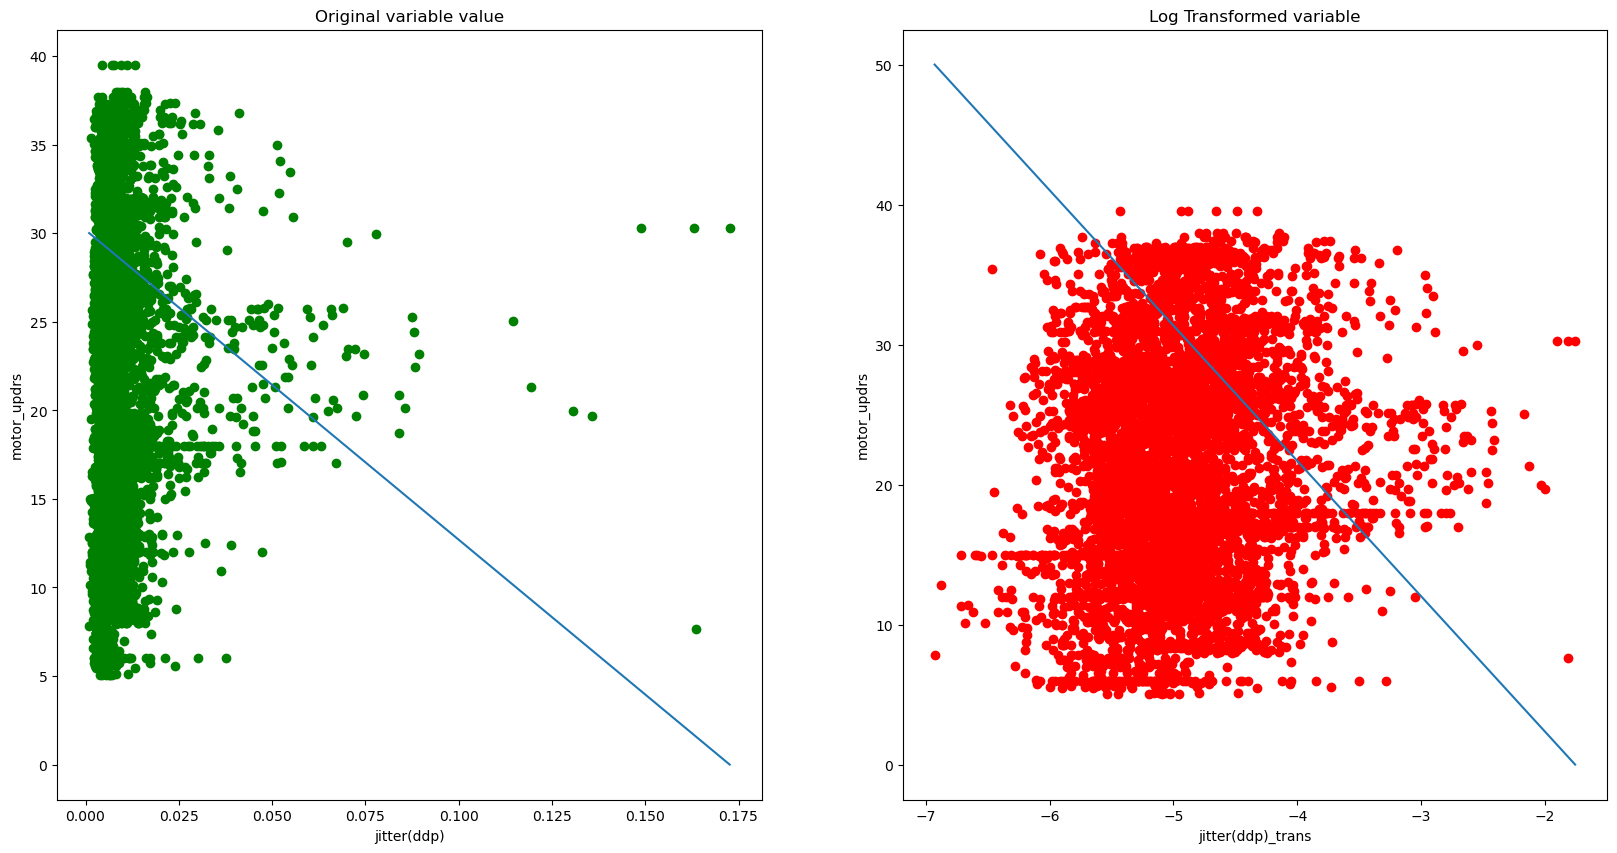

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.46e-263
Time:                        10:07:34   Log-Likelihood:                -20011.
No. Observations:                5875   AIC:                         4.005e+04
Df Residuals:                    5861   BIC:                         4.014e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.9620      2.316     11.

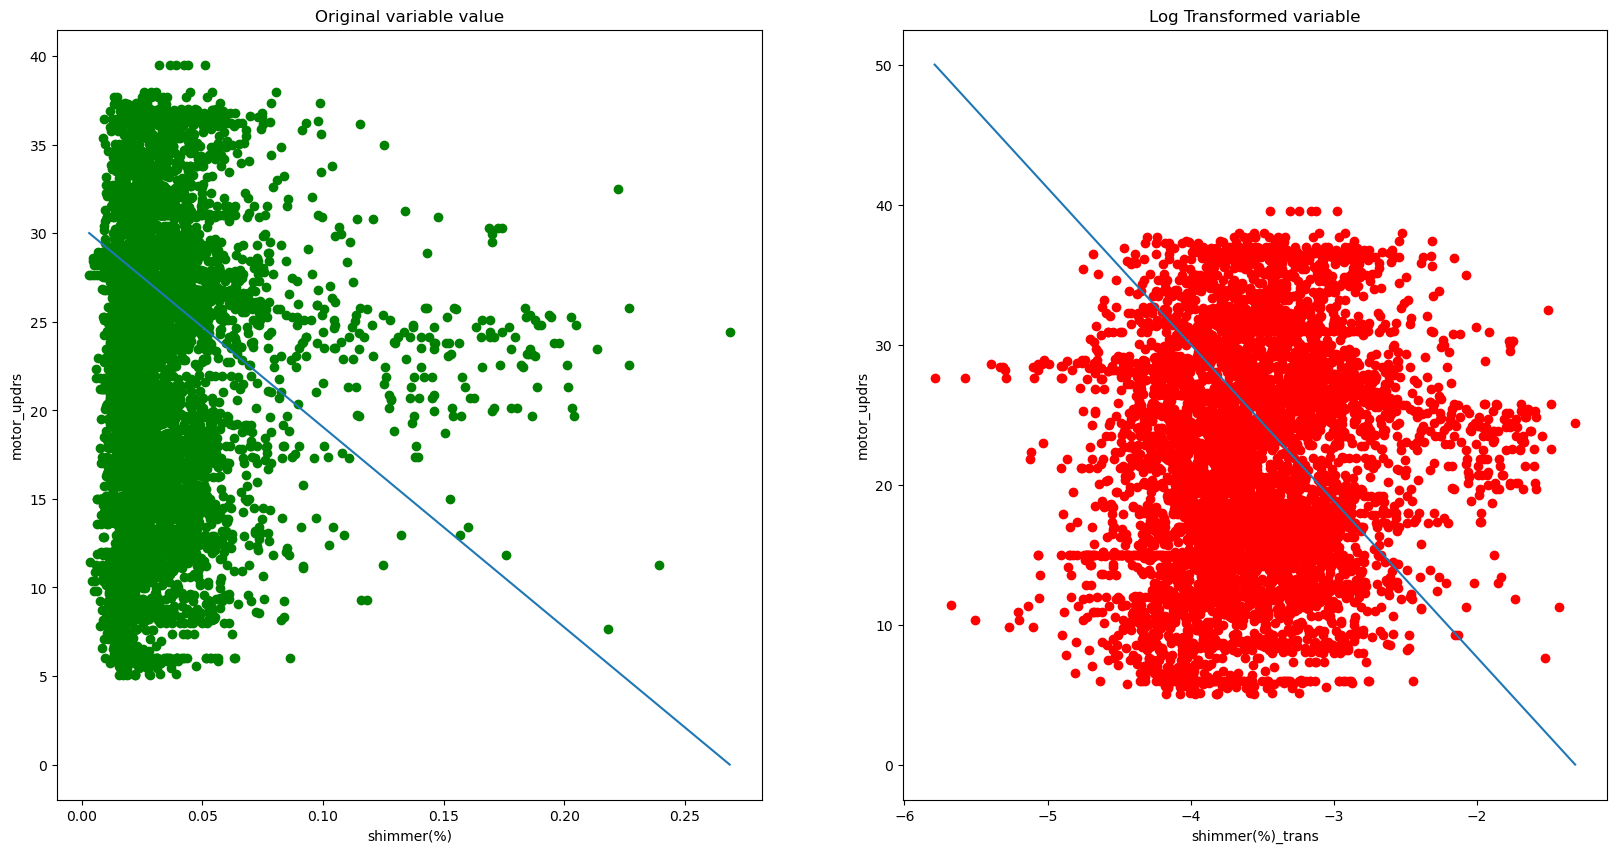

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.08e-264
Time:                        10:07:34   Log-Likelihood:                -20011.
No. Observations:                5875   AIC:                         4.005e+04
Df Residuals:                    5862   BIC:                         4.014e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.7822      2.308     11.

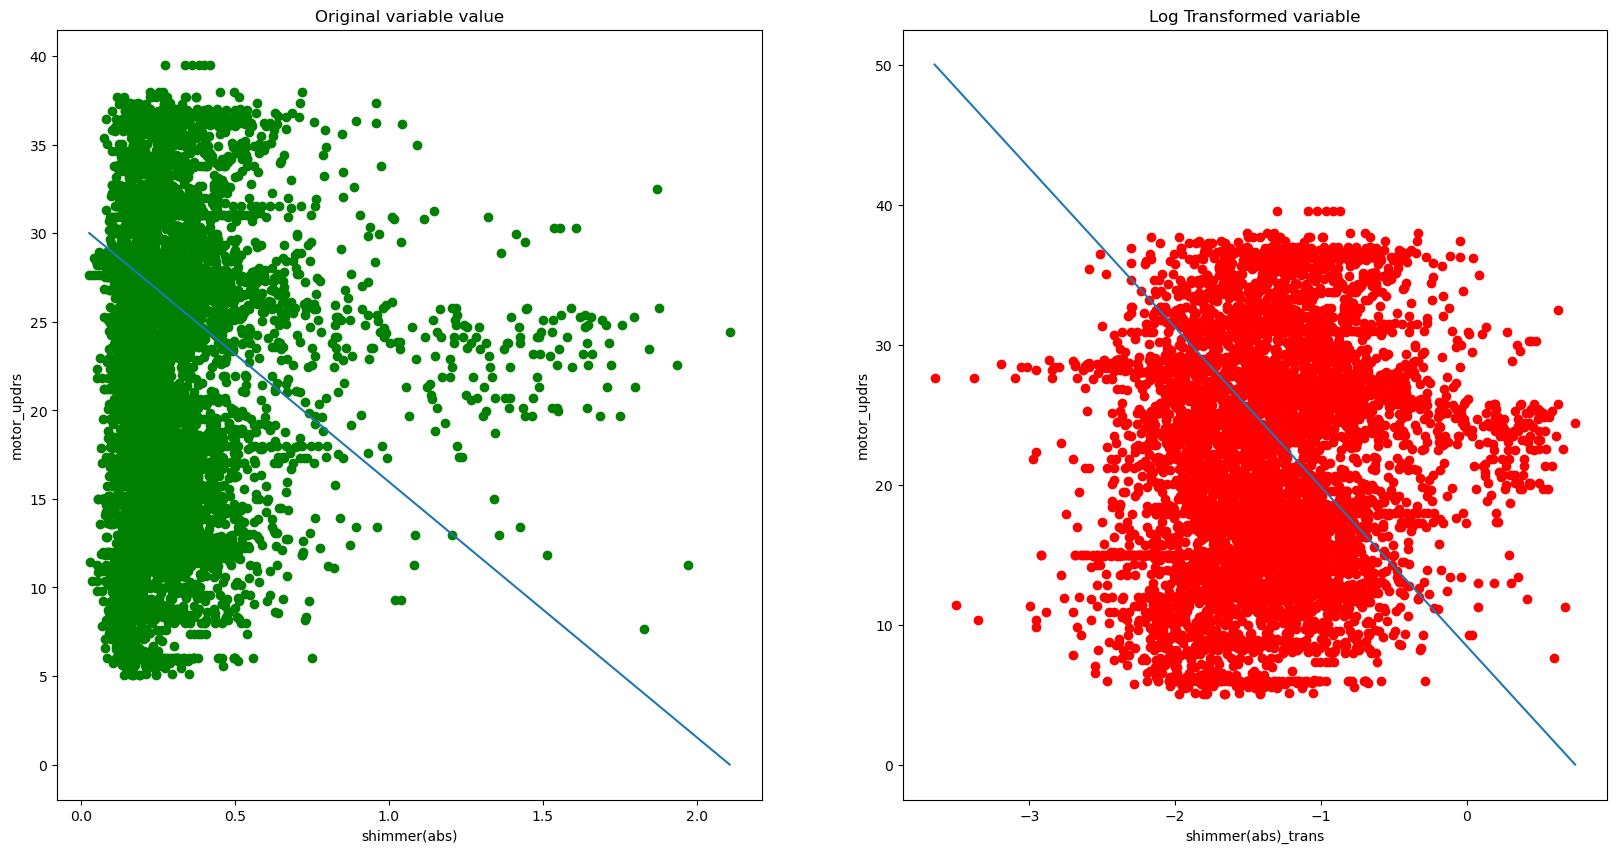

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.08e-265
Time:                        10:07:35   Log-Likelihood:                -20011.
No. Observations:                5875   AIC:                         4.005e+04
Df Residuals:                    5863   BIC:                         4.013e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.7720      2.308     11.

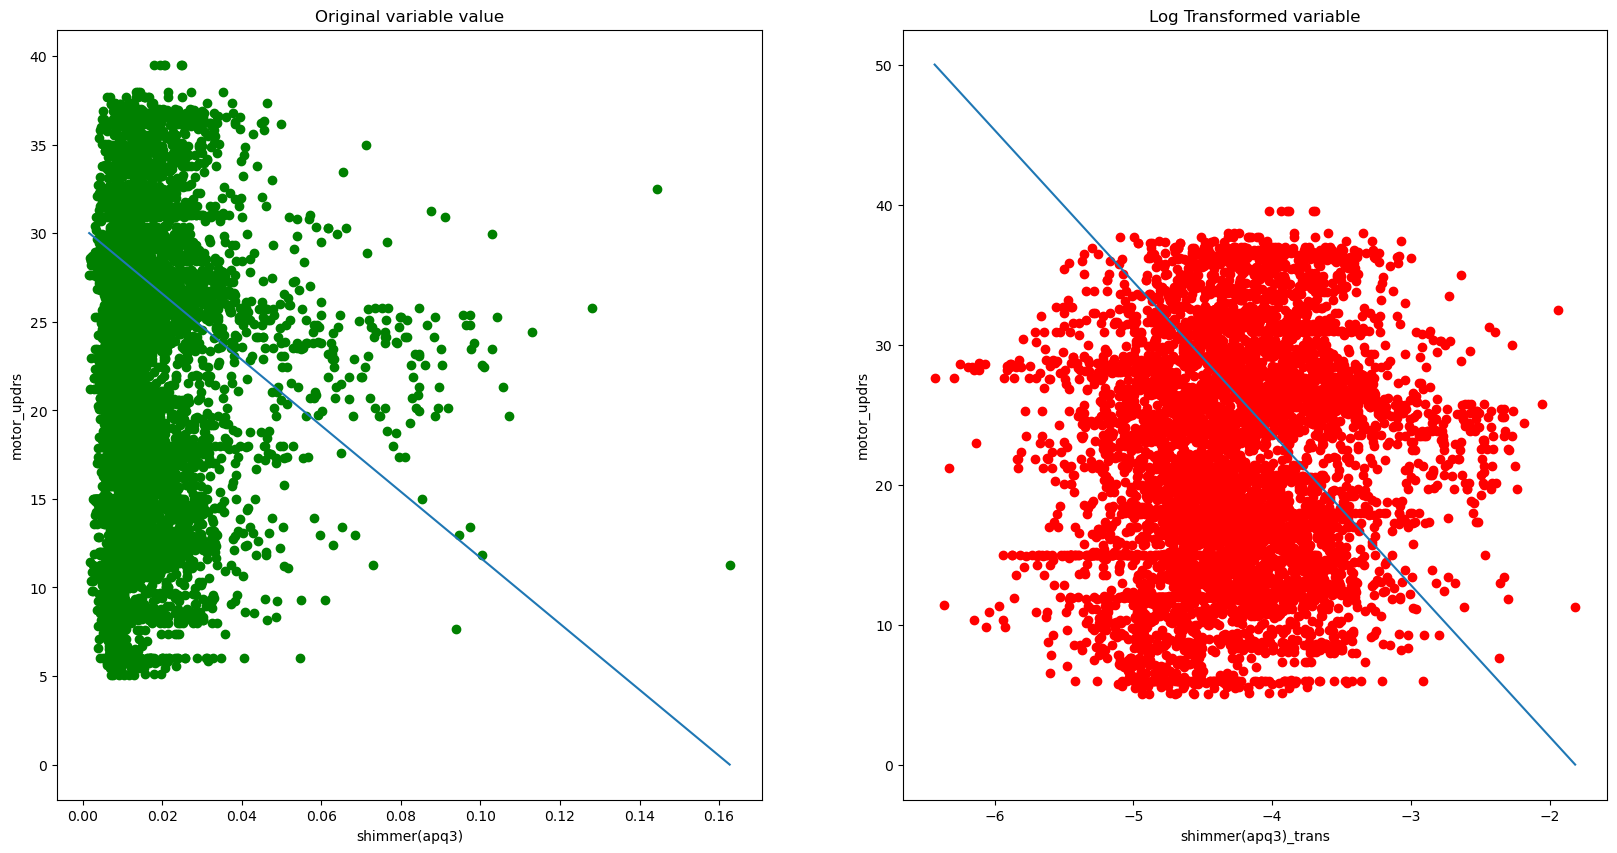

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     141.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.72e-266
Time:                        10:07:36   Log-Likelihood:                -20011.
No. Observations:                5875   AIC:                         4.004e+04
Df Residuals:                    5864   BIC:                         4.012e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.7773      2.308     11.

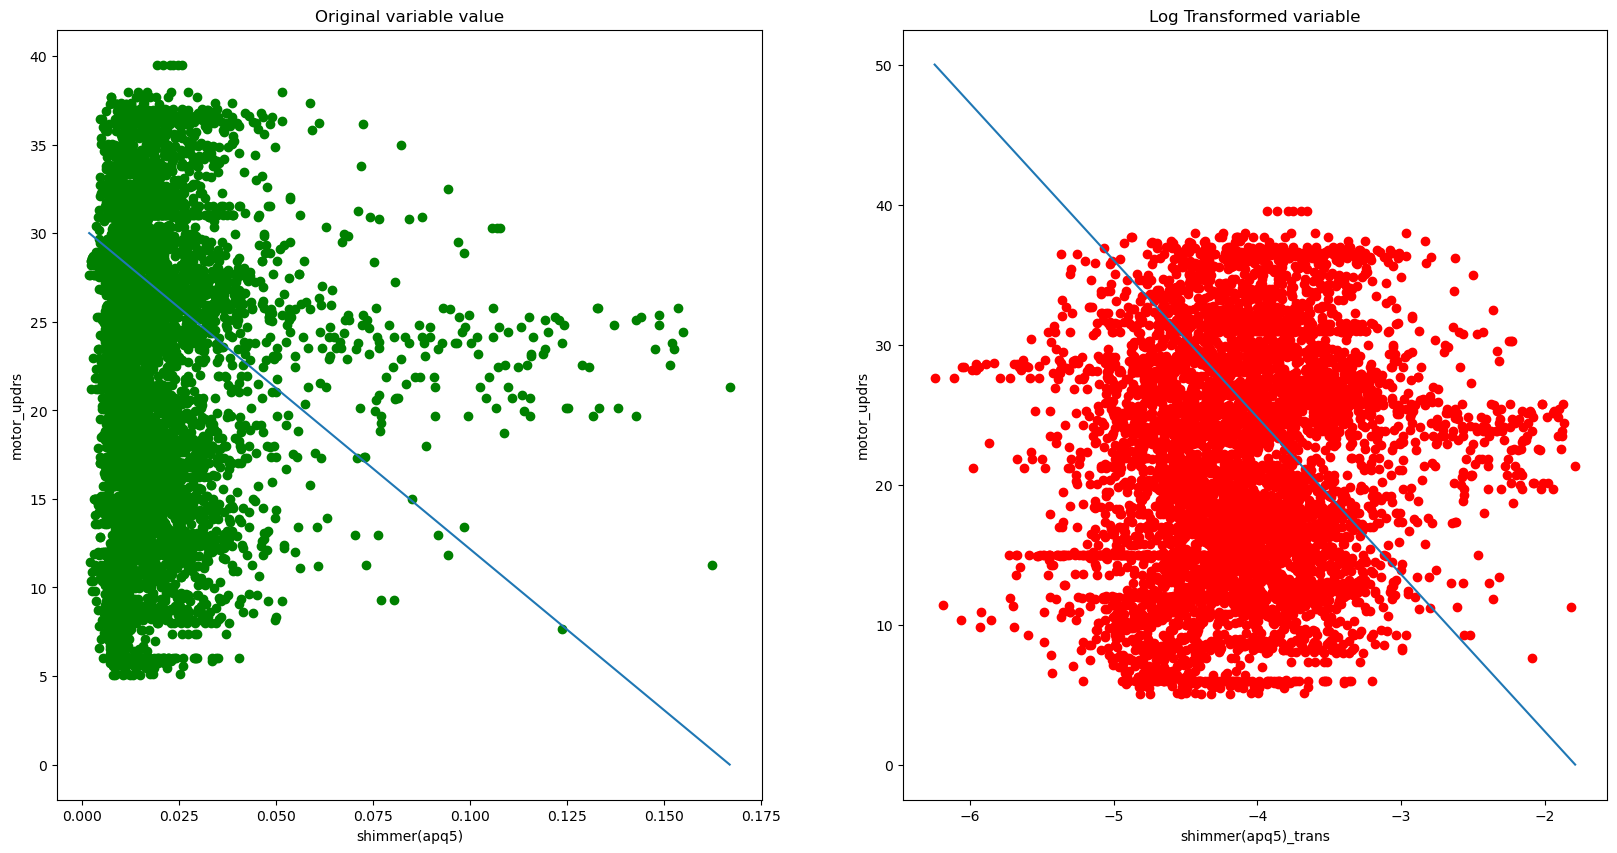

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     156.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          6.07e-267
Time:                        10:07:36   Log-Likelihood:                -20013.
No. Observations:                5875   AIC:                         4.005e+04
Df Residuals:                    5865   BIC:                         4.011e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.6335      2.307     11.

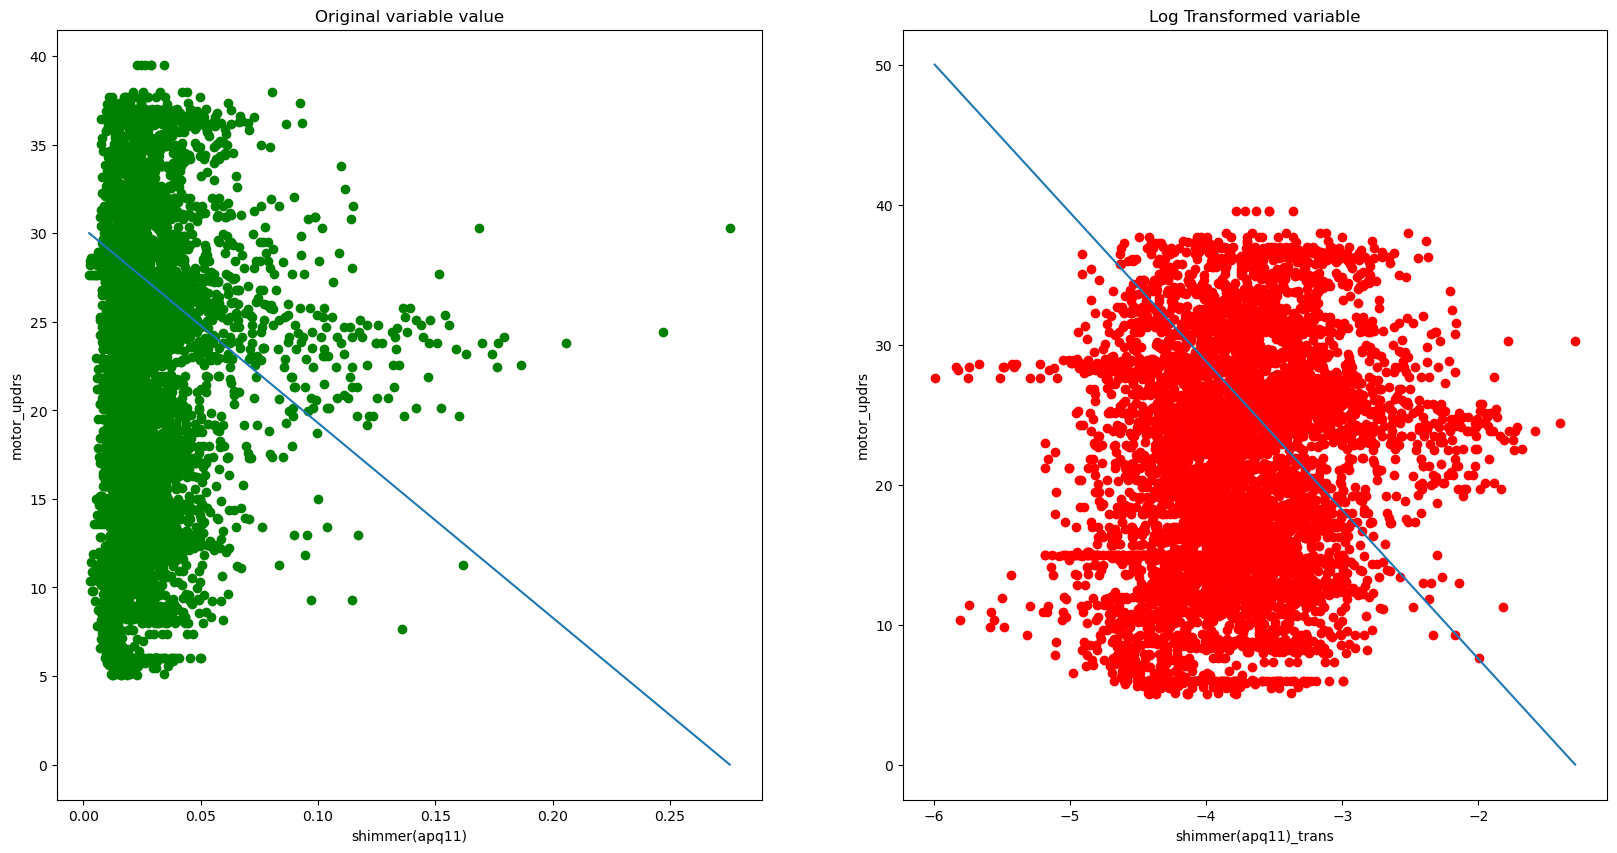

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          8.98e-264
Time:                        10:07:37   Log-Likelihood:                -20023.
No. Observations:                5875   AIC:                         4.006e+04
Df Residuals:                    5866   BIC:                         4.012e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.3243      2.309     10.966   

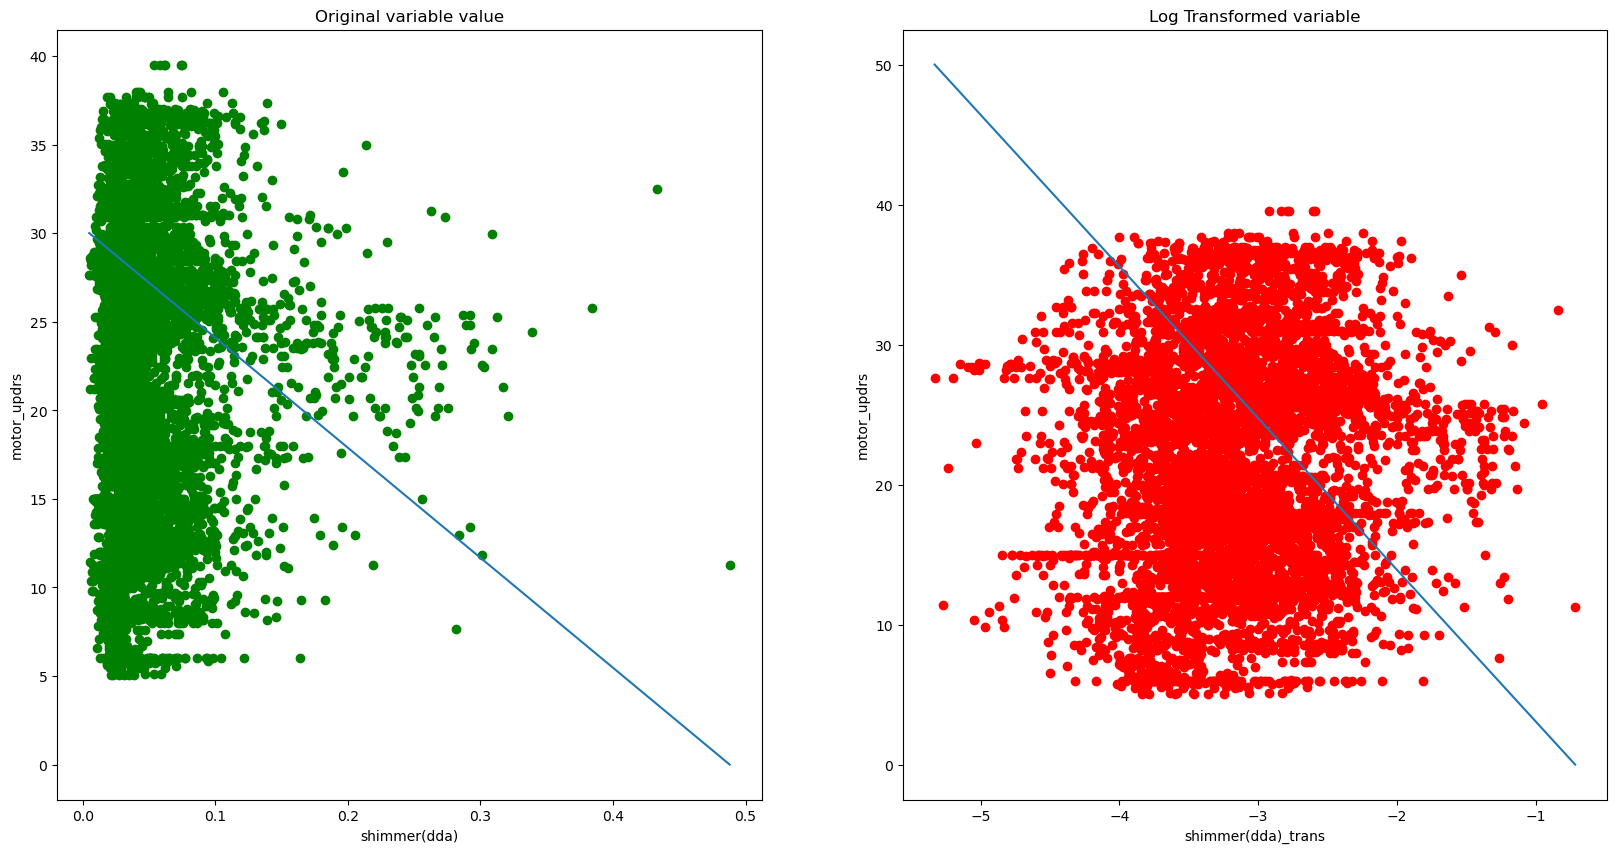

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.33e-263
Time:                        10:07:38   Log-Likelihood:                -20026.
No. Observations:                5875   AIC:                         4.007e+04
Df Residuals:                    5867   BIC:                         4.012e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0916      2.158     10.702      0.0

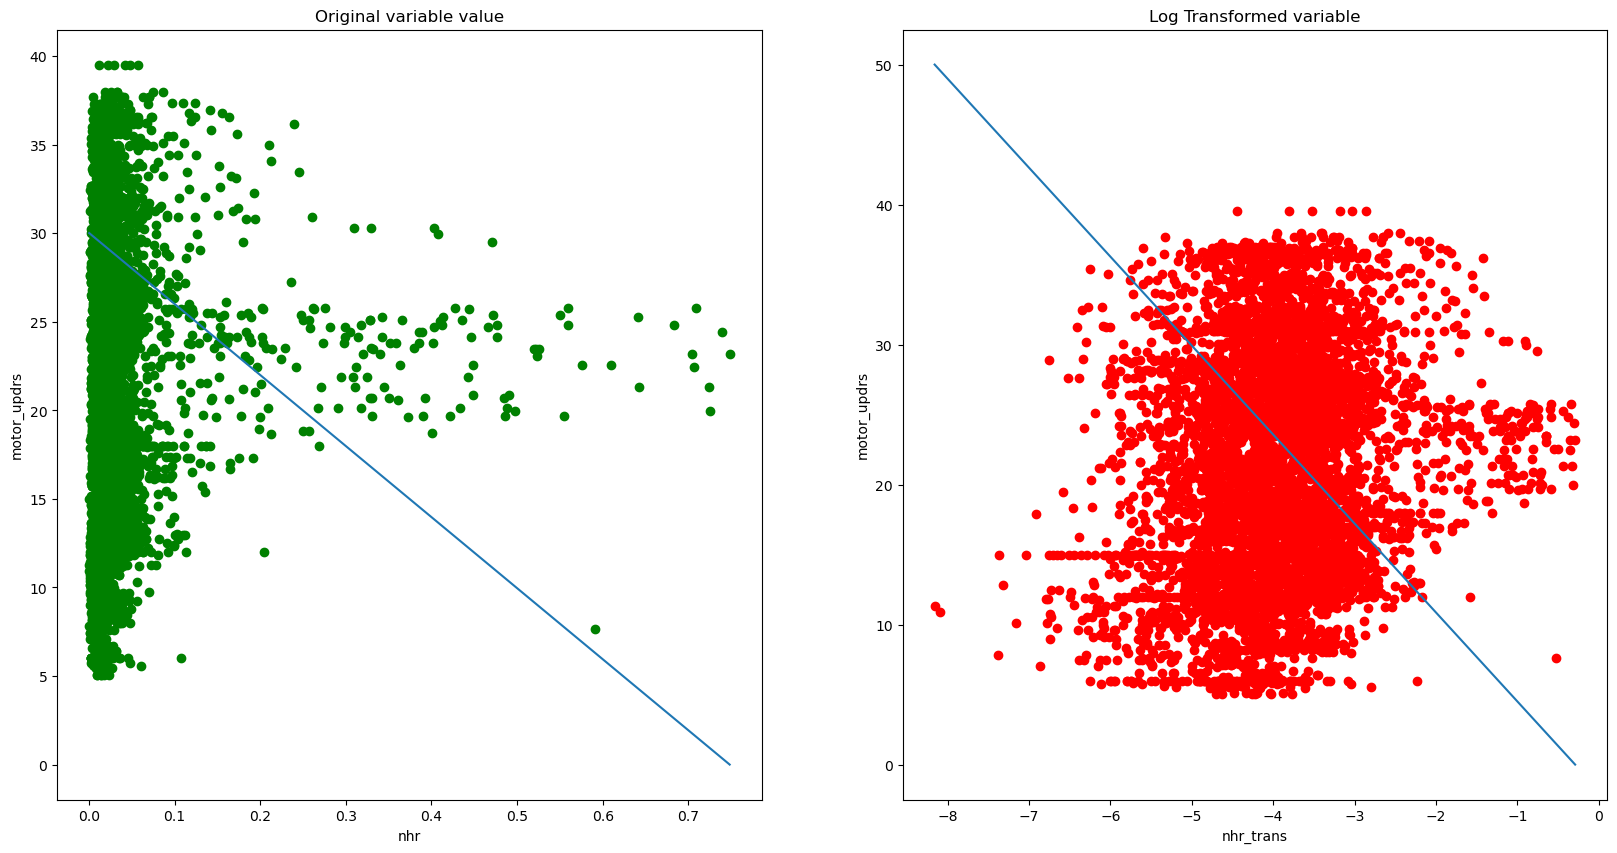

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          4.40e-247
Time:                        10:07:38   Log-Likelihood:                -20067.
No. Observations:                5875   AIC:                         4.015e+04
Df Residuals:                    5868   BIC:                         4.019e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7624      1.906      7.220      0.0

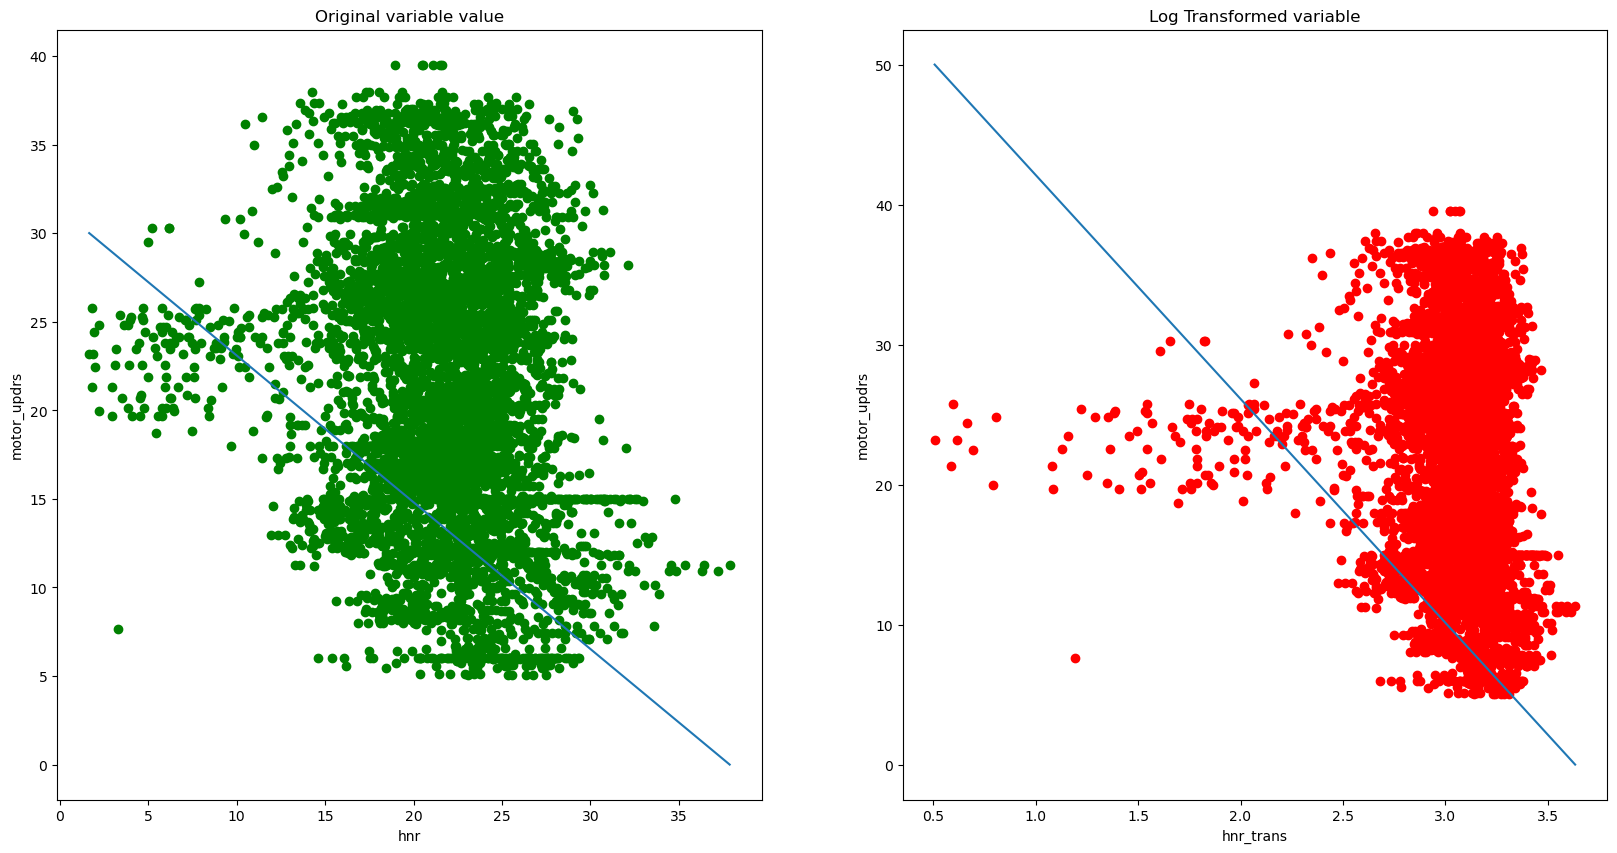

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     256.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.92e-248
Time:                        10:07:39   Log-Likelihood:                -20067.
No. Observations:                5875   AIC:                         4.015e+04
Df Residuals:                    5869   BIC:                         4.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1126      1.319      9.939      0.0

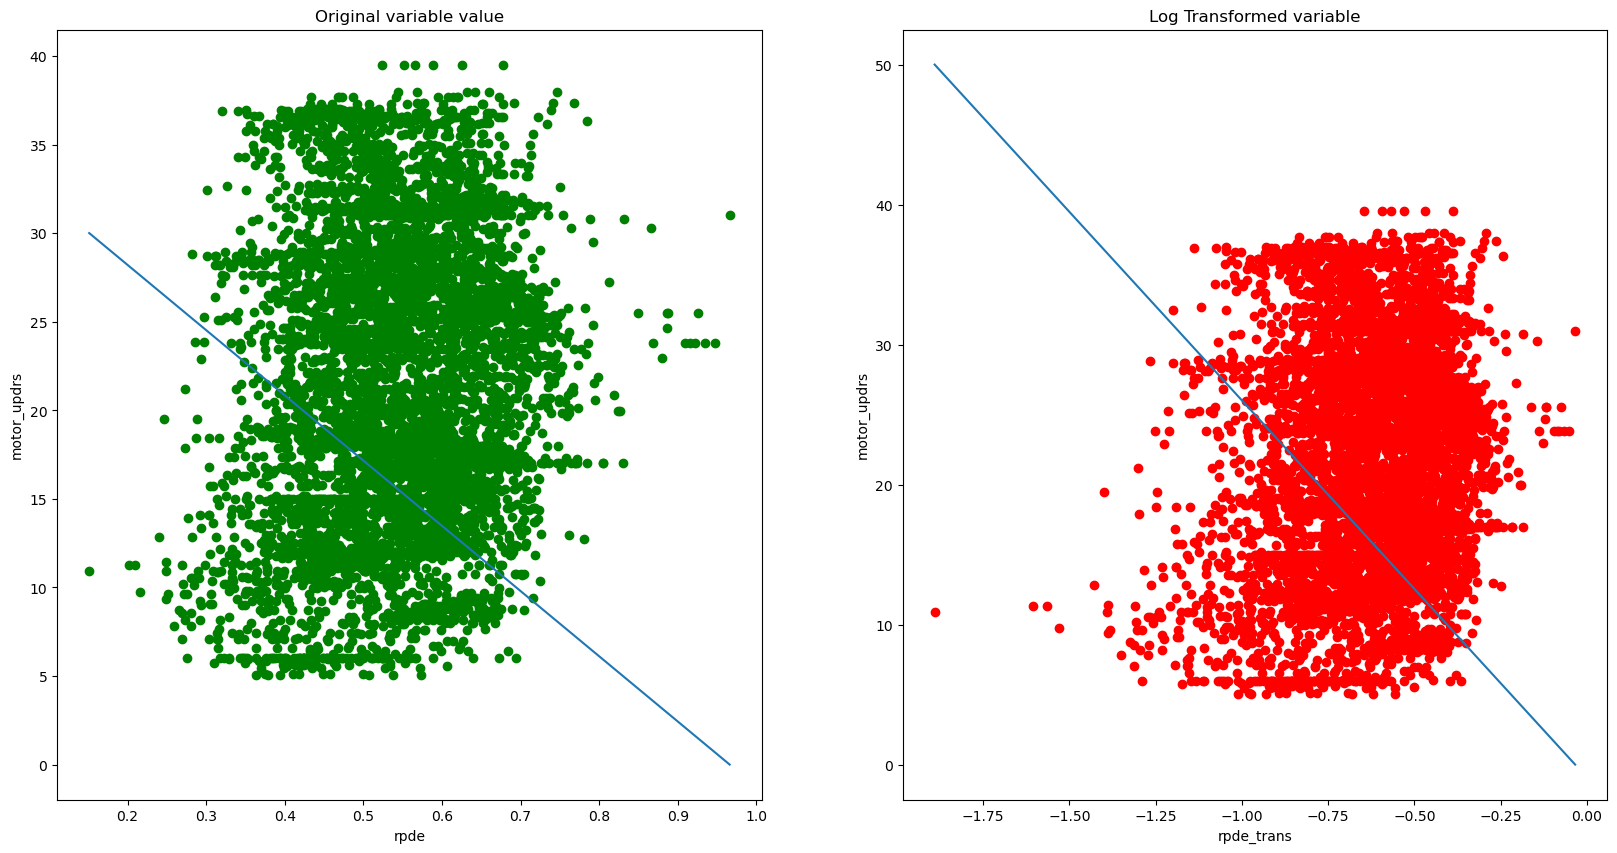

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     319.8
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.88e-249
Time:                        10:07:39   Log-Likelihood:                -20068.
No. Observations:                5875   AIC:                         4.015e+04
Df Residuals:                    5870   BIC:                         4.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6489      1.230     11.098      0.0

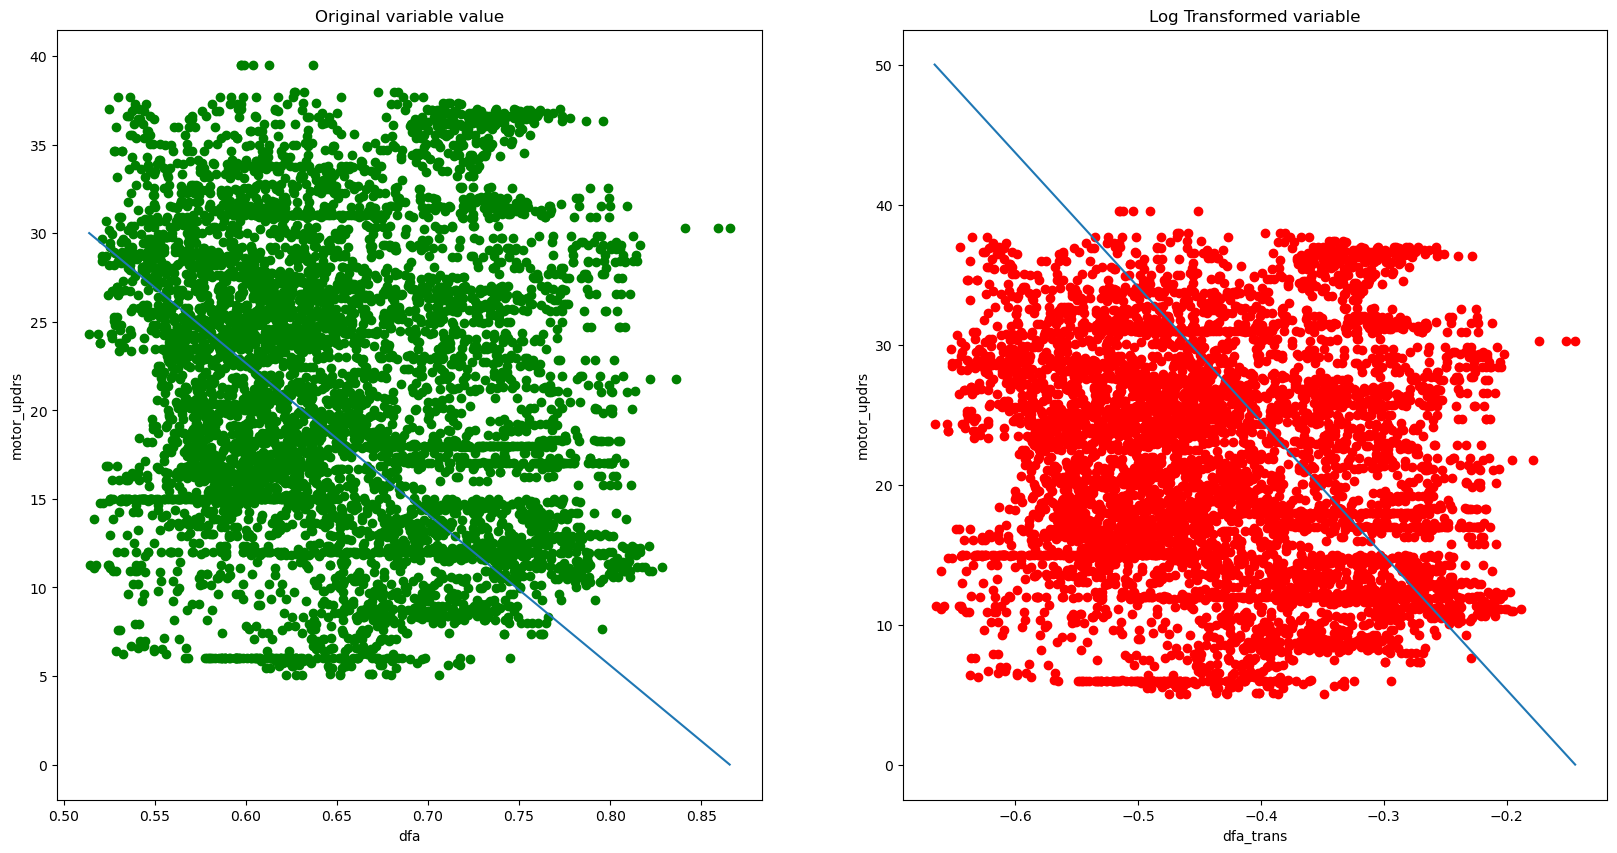

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     348.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          2.50e-208
Time:                        10:07:39   Log-Likelihood:                -20165.
No. Observations:                5875   AIC:                         4.034e+04
Df Residuals:                    5871   BIC:                         4.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1070      0.759     -0.141      0.8

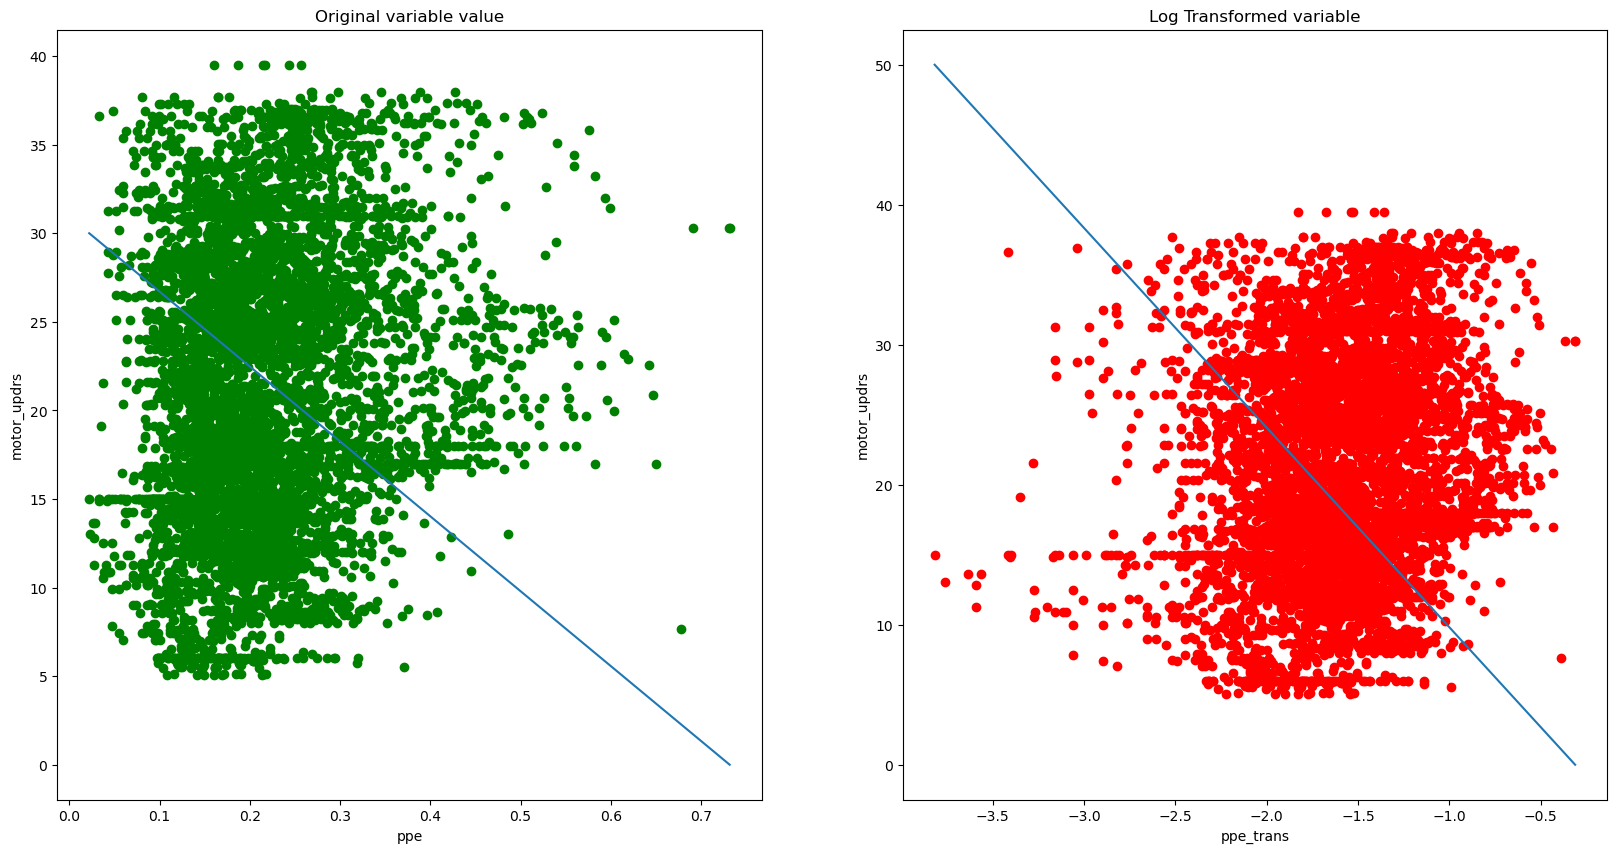

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     491.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          6.78e-198
Time:                        10:07:40   Log-Likelihood:                -20192.
No. Observations:                5875   AIC:                         4.039e+04
Df Residuals:                    5872   BIC:                         4.041e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7762      0.753      1.031      0.3

In [2]:
#doing log transformation to improve linearity 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

# Separate explanatory variables (x) from the response variable (y)
df = df[['subject#', 'age', 'sex', 'test_time', 
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe','motor_updrs','total_updrs']]
Y_mupdrs = df.iloc[:, -2] #i.e. it has motor_updrs 

# List of columns to transform
columns_to_transform = ['sex', 'test_time', 'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
                        'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
                        'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
                        'dfa', 'ppe']

# Create a new DataFrame to store the transformed columns
transformed_df = df[['motor_updrs', 'total_updrs']]

# Iterate over the columns to perform transformations
for column in columns_to_transform:
    # Create a new column name for the transformed variable
    transcolumnname = column + '_trans'
    
    # Apply log transformation to the specified column and add it to the new DataFrame
    transformed_df[transcolumnname] = df[column].apply(np.log)

    # Visualize the effect of the transformation
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.scatter(df[column], df["motor_updrs"], color="green")
    plt.title("Original variable value")
    plt.xlabel(column)
    plt.ylabel("motor_updrs")
    plt.plot([df[column].min(), df[column].max()], [30, 0])

    plt.subplot(1, 2, 2)
    plt.scatter(transformed_df[transcolumnname], df["motor_updrs"], color="red")
    plt.title("Log Transformed variable")
    plt.xlabel(transcolumnname)
    plt.ylabel("motor_updrs")
    plt.plot([transformed_df[transcolumnname].min(), transformed_df[transcolumnname].max()], [50, 0])

    plt.show()

    """
    RE-RUN THE LINEAR REGRESSION MODEL WITH A TRANSFORMED VARIABLE
    """
    # Drop the original column from the DataFrame
    df = df.drop(column, axis=1)

    # Separate explanatory variables (x) from the response variable (y)
    X = df.iloc[:, :-2]
    
    # Build and evaluate the linear regression model
    X = sm.add_constant(X)
    model = sm.OLS(Y_mupdrs, X).fit()
    pred = model.predict(X)
    model_details = model.summary()
    print(model_details)

    print("\nlog transformation of " + column + " done.\n")

# Save the transformed DataFrame to a CSV file
transformed_df.to_csv("PO2_transformed_m.csv", index=False)


C:\Users\Ruhani Kakkar\AppData\Local\Temp\ipykernel_10872\110366769.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_df[transcolumnname] = df[column].apply(np.log)


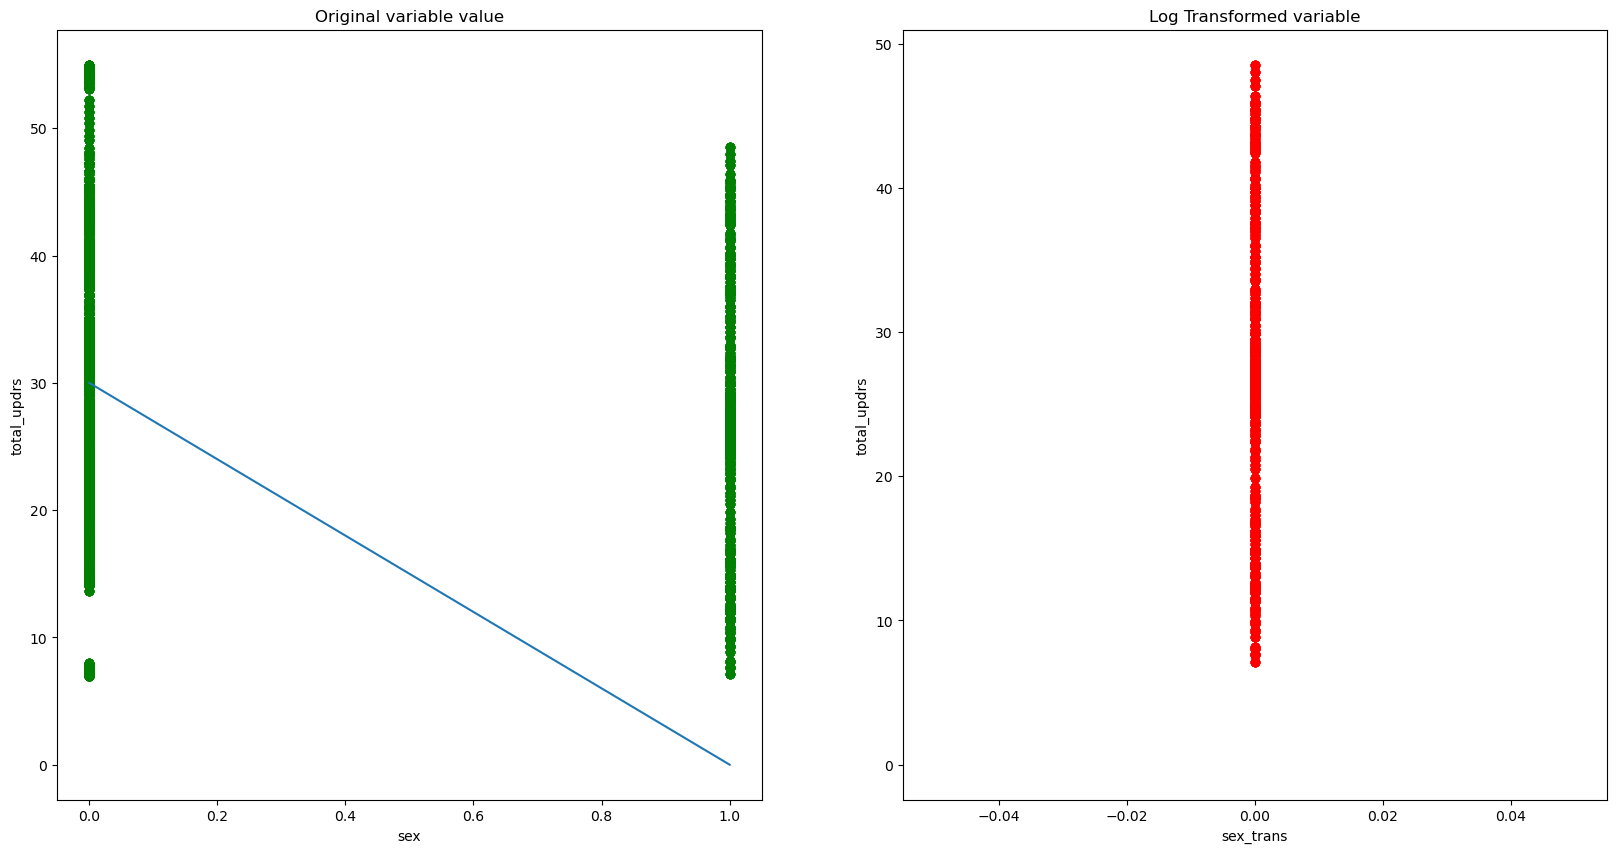

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2823.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:08   Log-Likelihood:                -15314.
No. Observations:                5875   AIC:                         3.067e+04
Df Residuals:                    5854   BIC:                         3.081e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2237      1.089      0.

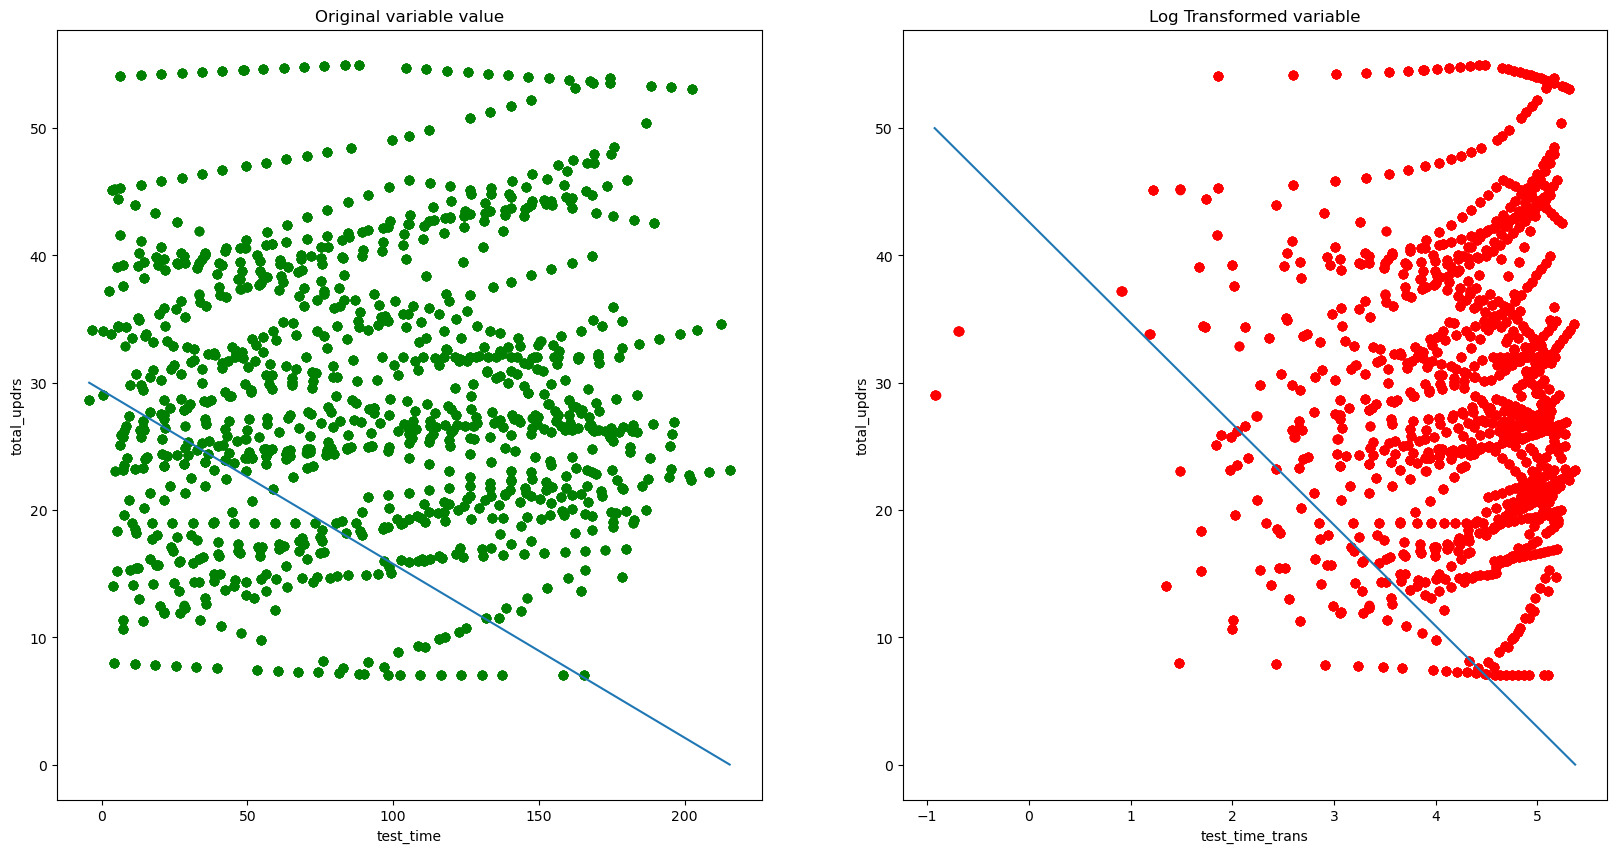

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2966.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:08   Log-Likelihood:                -15319.
No. Observations:                5875   AIC:                         3.068e+04
Df Residuals:                    5855   BIC:                         3.081e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3127      1.090      0.

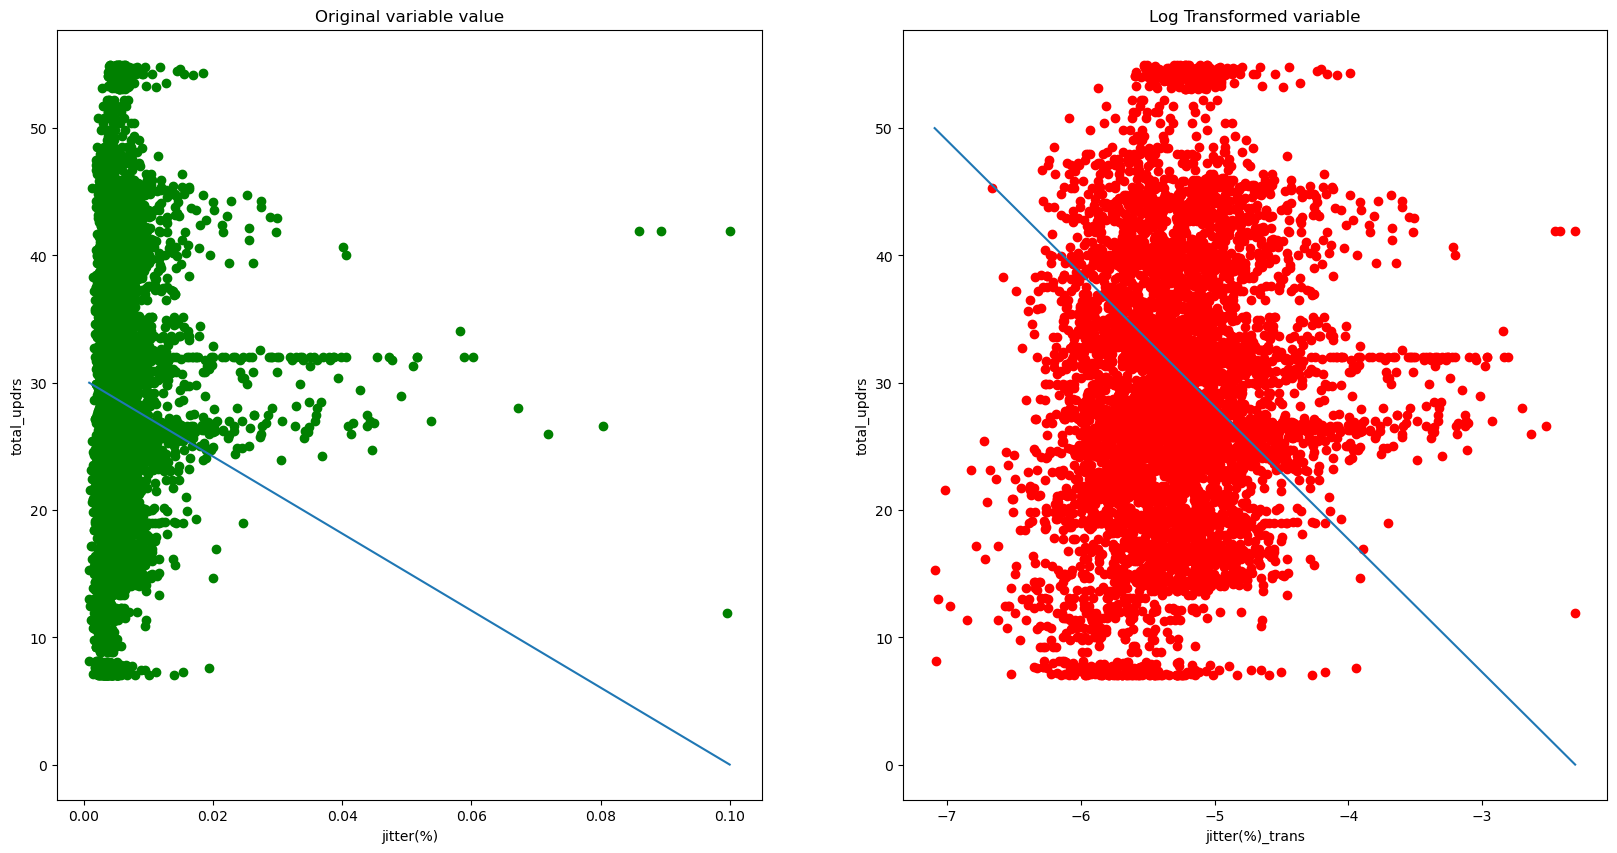

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     3120.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:09   Log-Likelihood:                -15329.
No. Observations:                5875   AIC:                         3.070e+04
Df Residuals:                    5856   BIC:                         3.082e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8003      1.086      0.

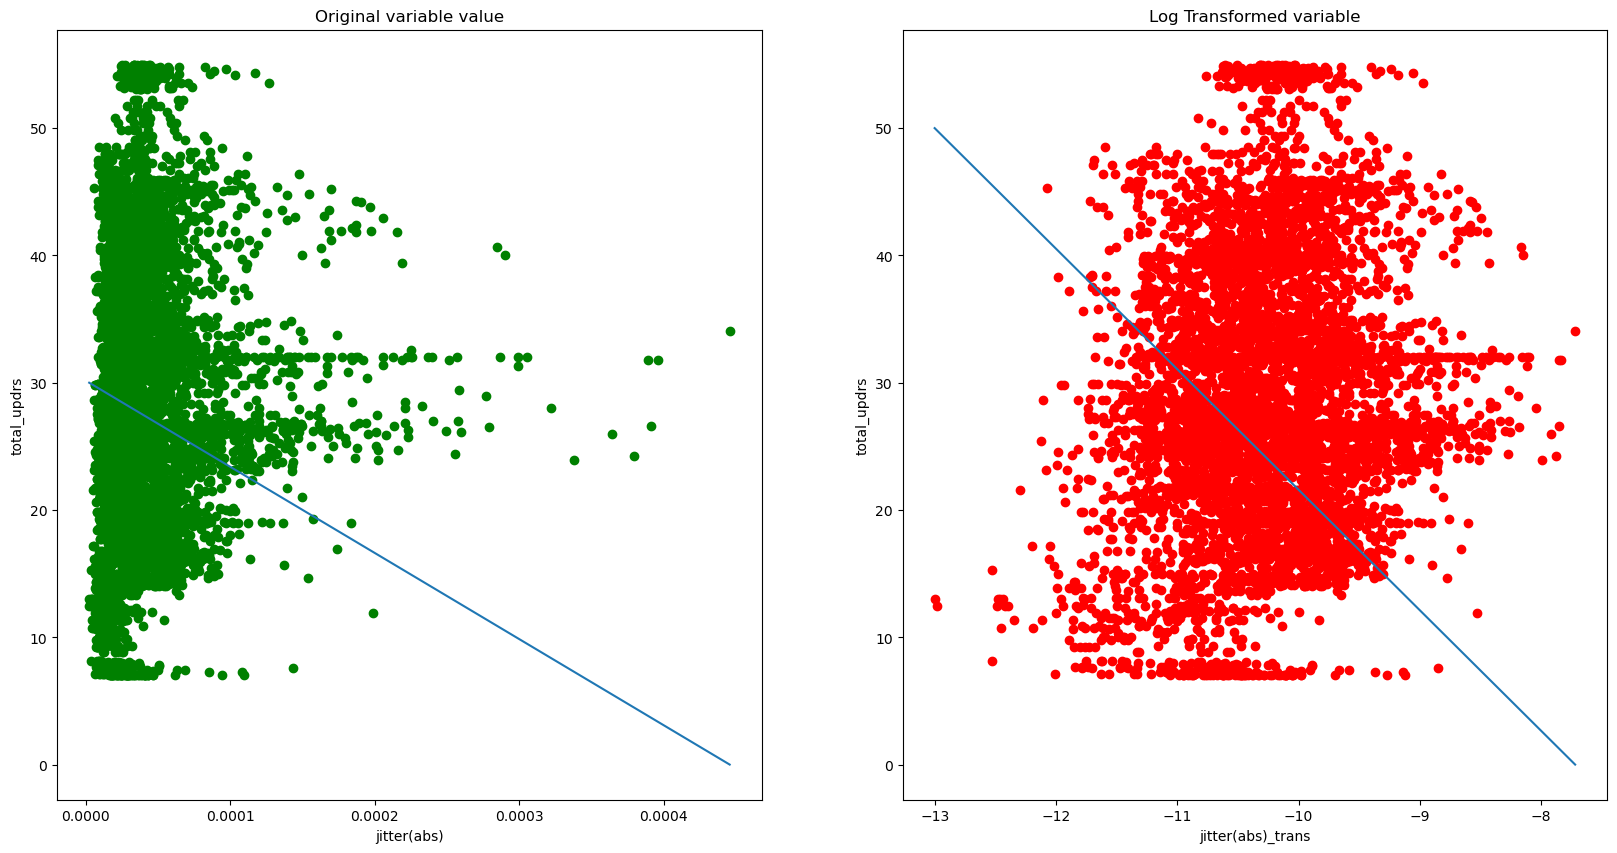

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3238.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:09   Log-Likelihood:                -15382.
No. Observations:                5875   AIC:                         3.080e+04
Df Residuals:                    5857   BIC:                         3.092e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3733      1.075     -1.

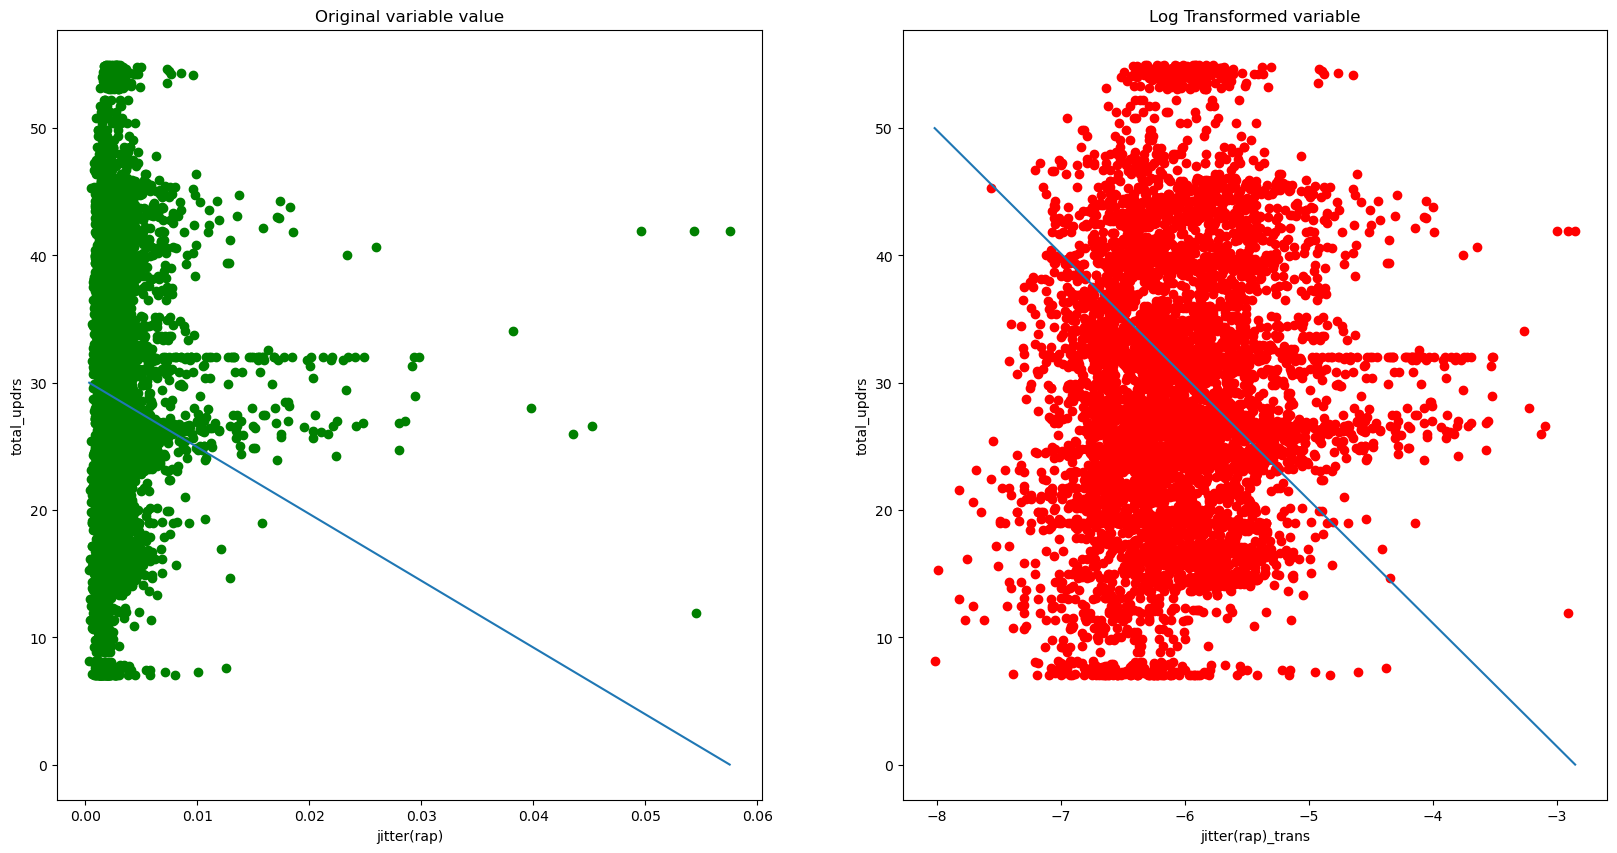

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3441.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:10   Log-Likelihood:                -15382.
No. Observations:                5875   AIC:                         3.080e+04
Df Residuals:                    5858   BIC:                         3.091e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3737      1.075     -1.

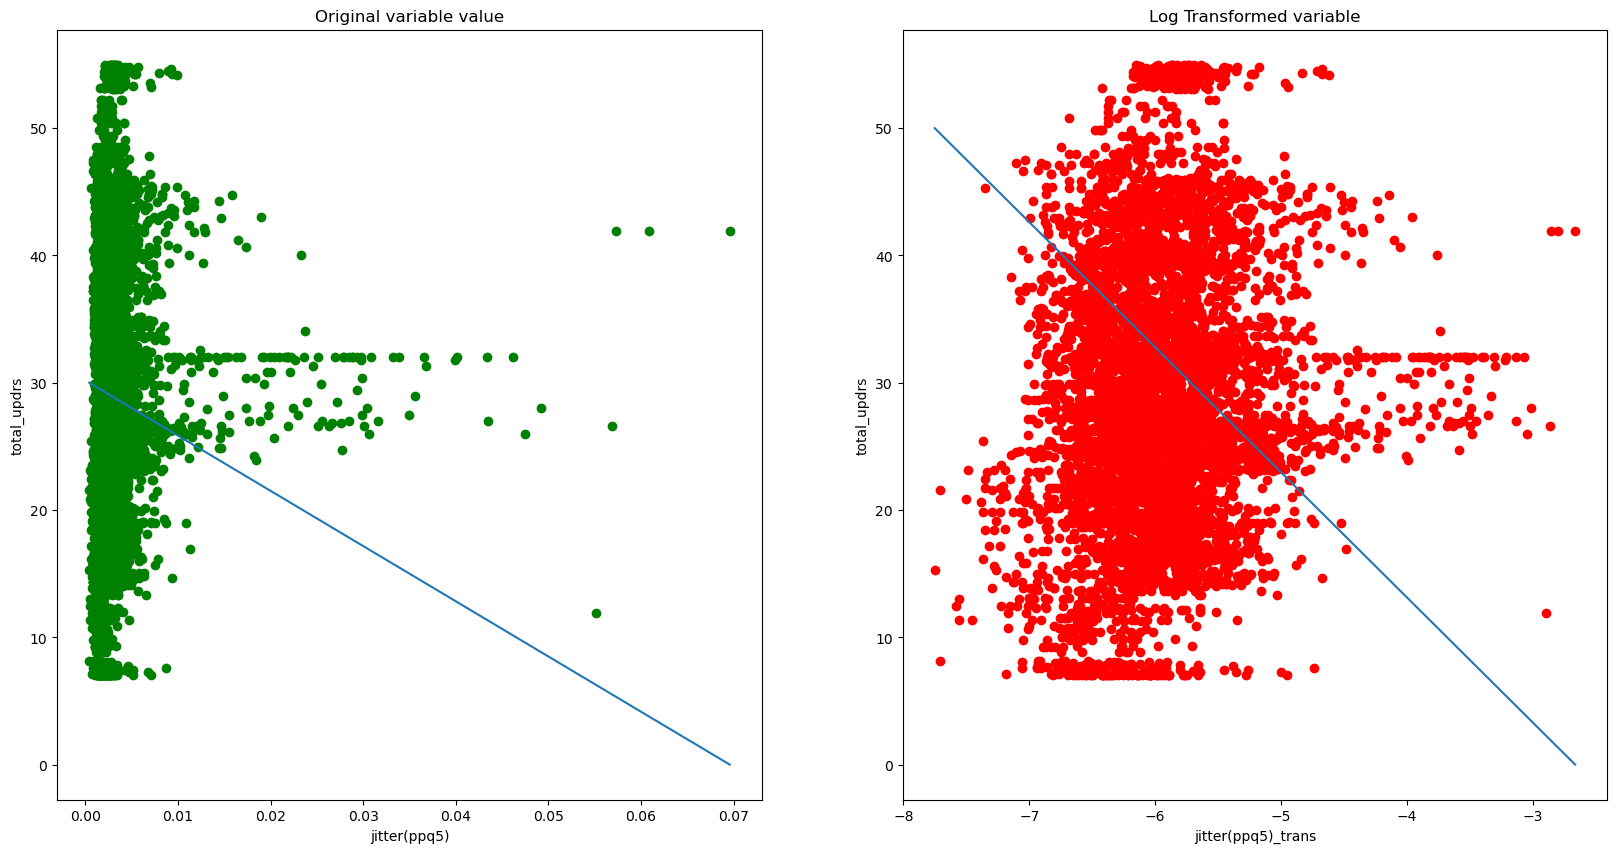

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     3670.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:11   Log-Likelihood:                -15383.
No. Observations:                5875   AIC:                         3.080e+04
Df Residuals:                    5859   BIC:                         3.090e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3442      1.075     -1.

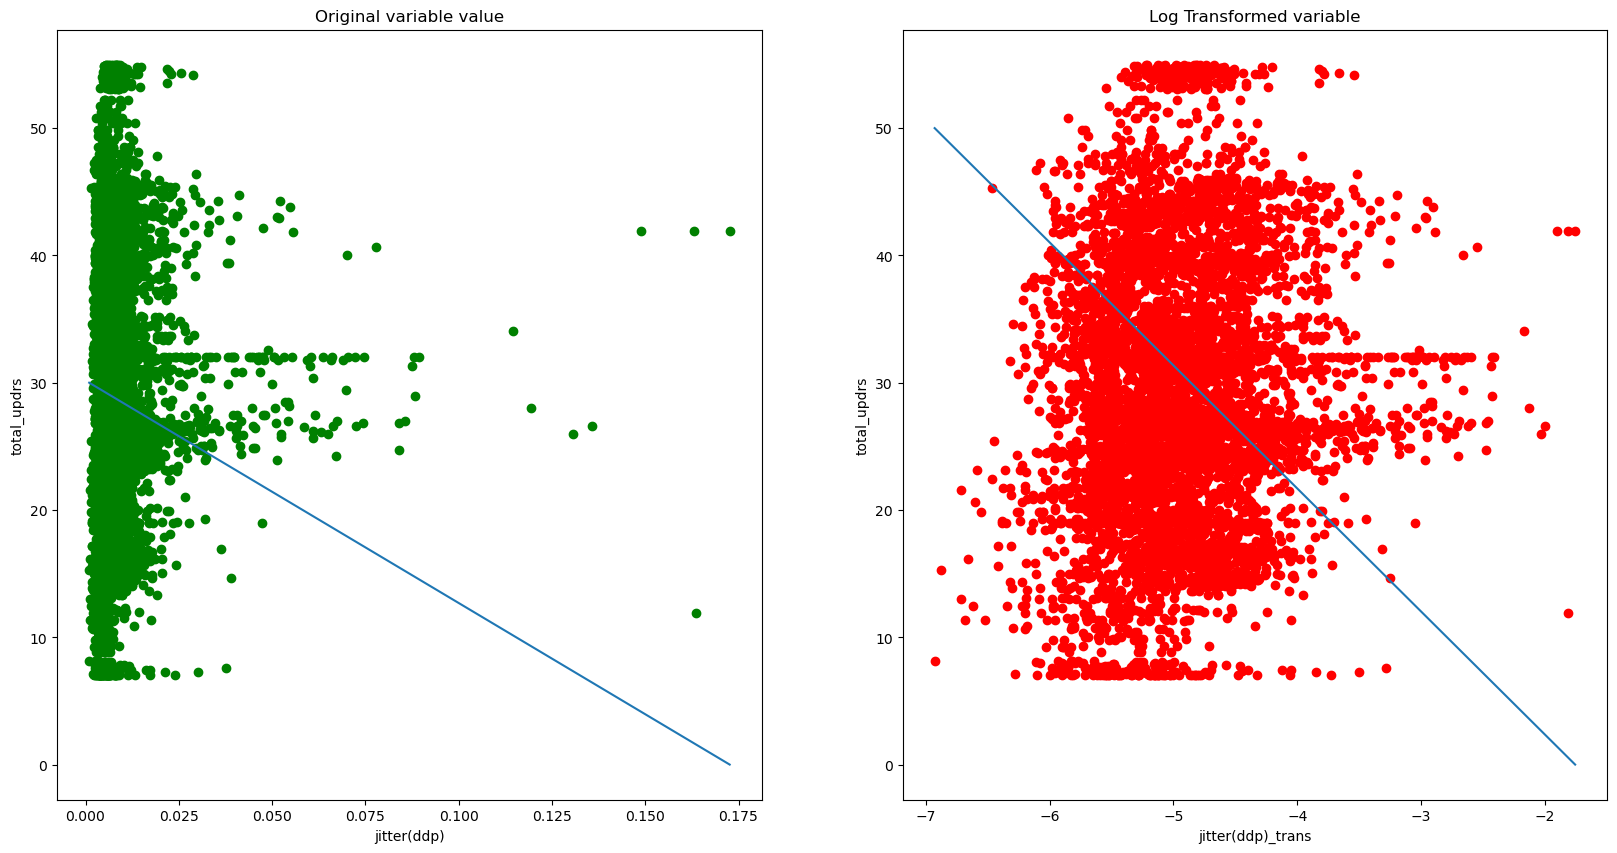

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3929.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:12   Log-Likelihood:                -15386.
No. Observations:                5875   AIC:                         3.080e+04
Df Residuals:                    5860   BIC:                         3.090e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7083      1.065     -1.

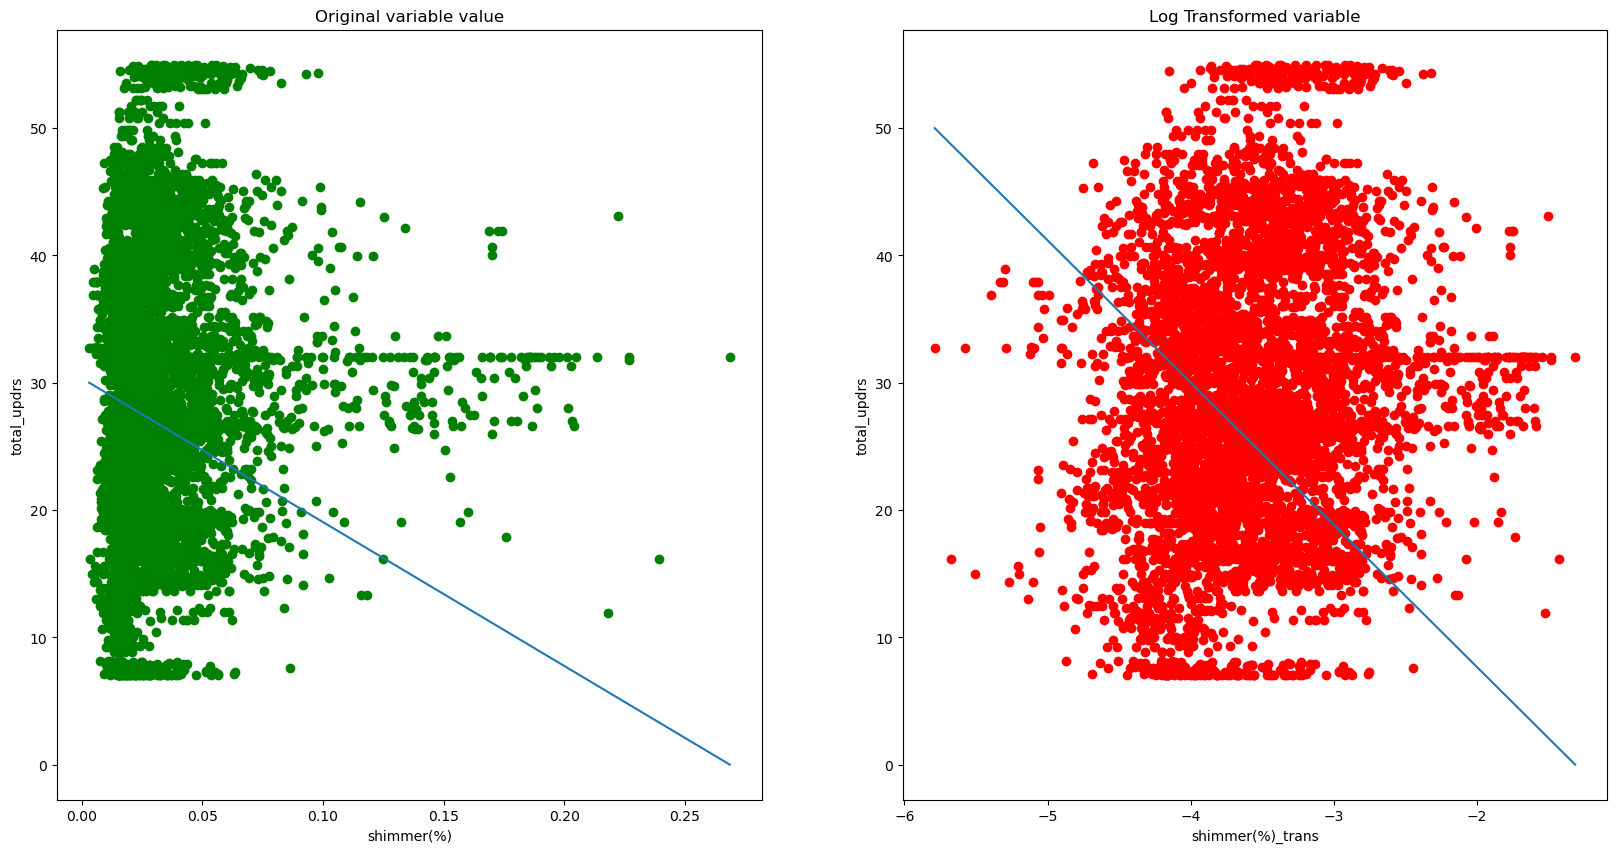

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4227.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:12   Log-Likelihood:                -15389.
No. Observations:                5875   AIC:                         3.081e+04
Df Residuals:                    5861   BIC:                         3.090e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4982      1.062     -1.

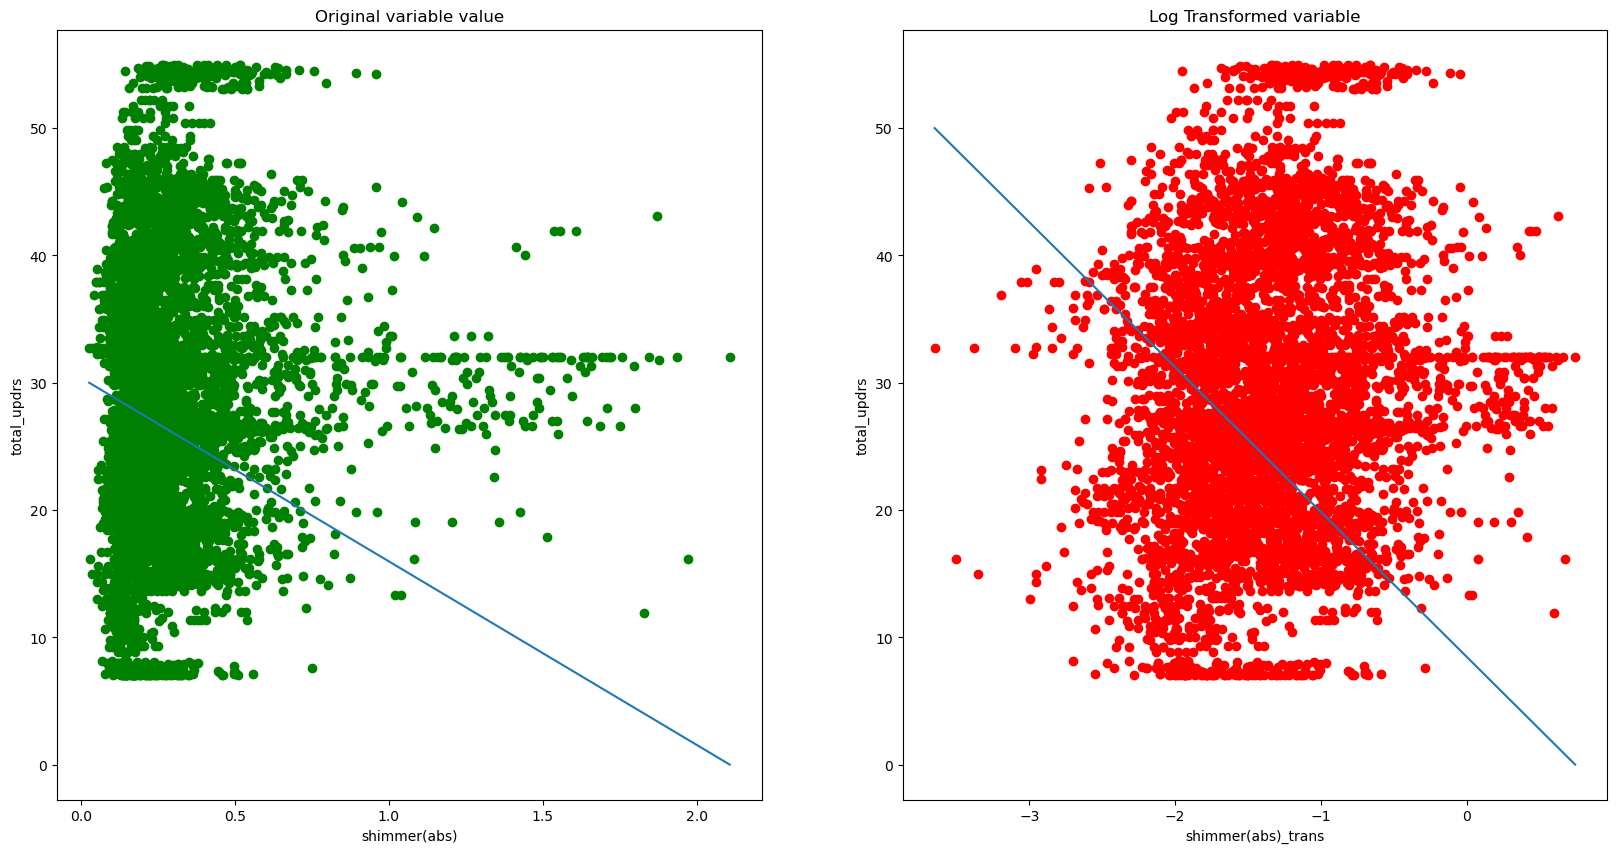

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4574.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:13   Log-Likelihood:                -15392.
No. Observations:                5875   AIC:                         3.081e+04
Df Residuals:                    5862   BIC:                         3.090e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4726      1.063     -1.

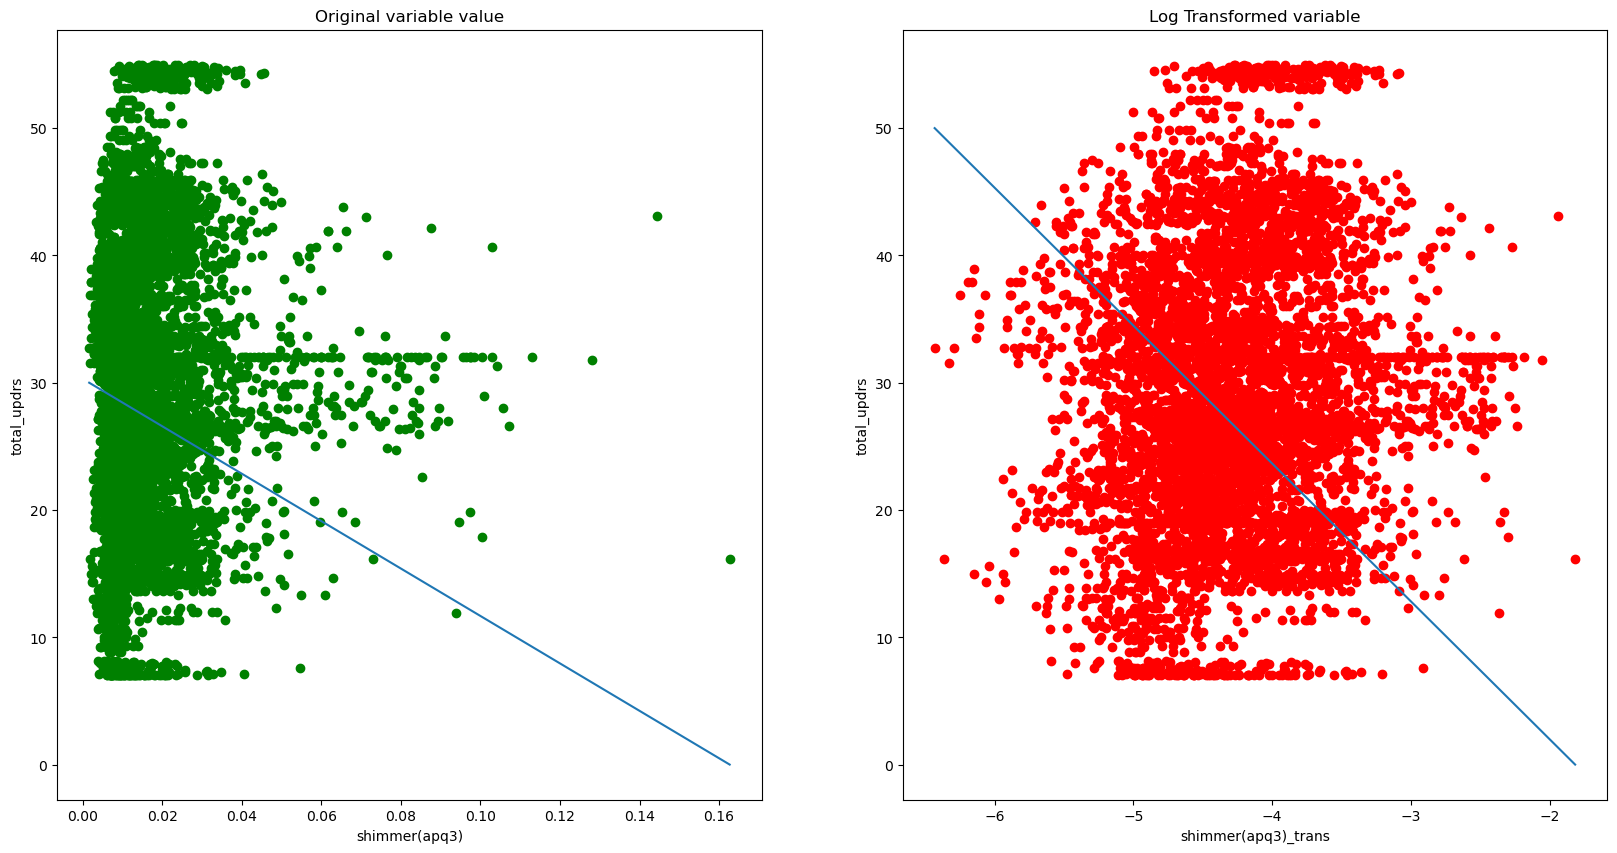

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4990.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:14   Log-Likelihood:                -15393.
No. Observations:                5875   AIC:                         3.081e+04
Df Residuals:                    5863   BIC:                         3.089e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4599      1.063     -1.

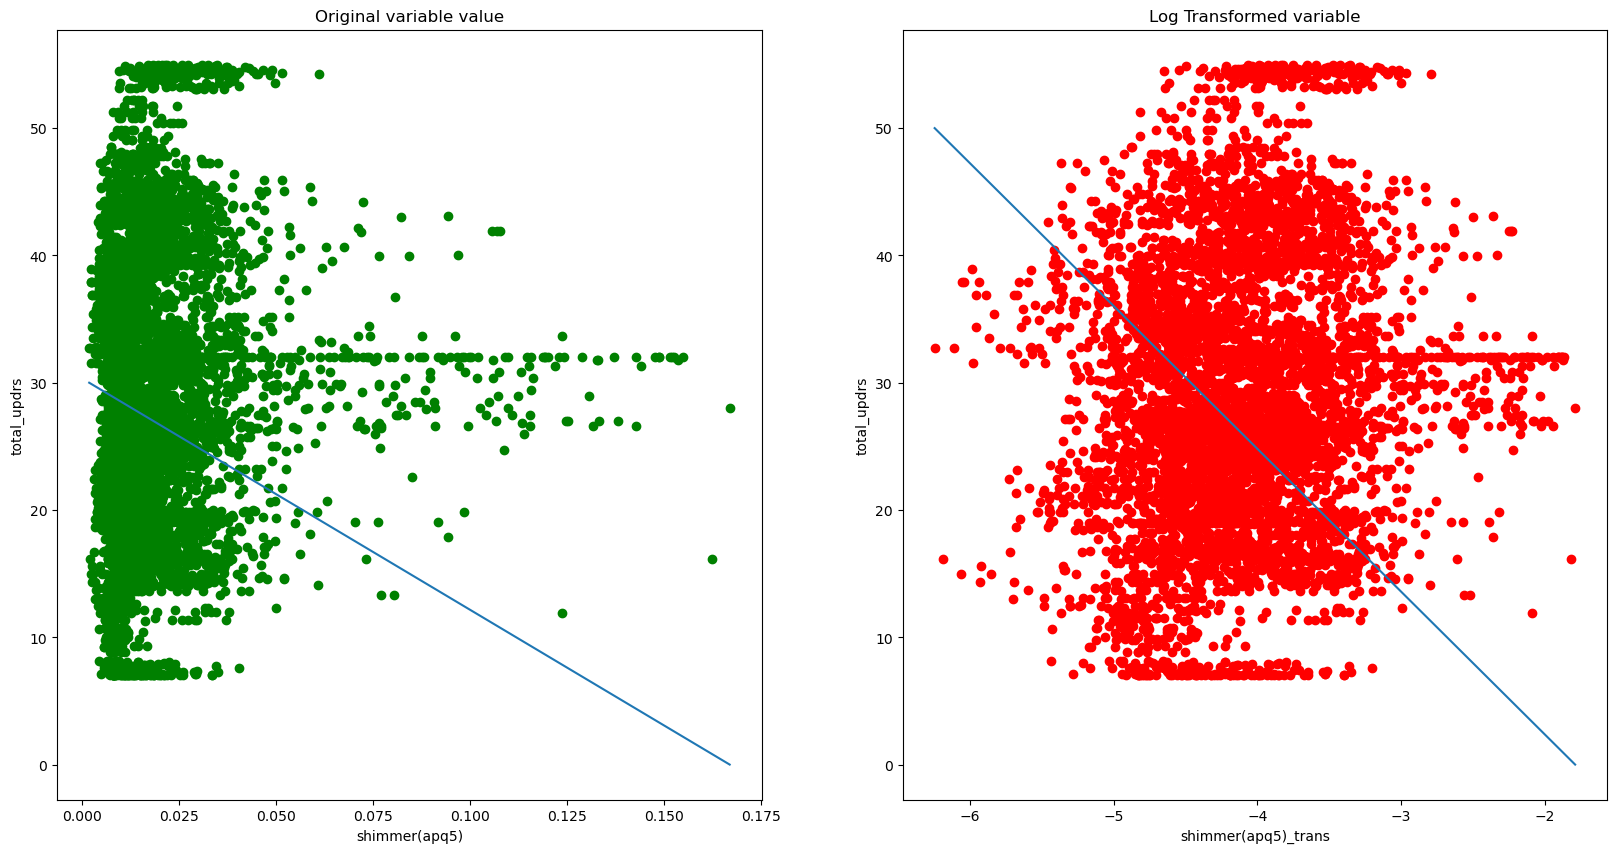

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     5477.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:15   Log-Likelihood:                -15399.
No. Observations:                5875   AIC:                         3.082e+04
Df Residuals:                    5864   BIC:                         3.089e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3169      1.063     -1.

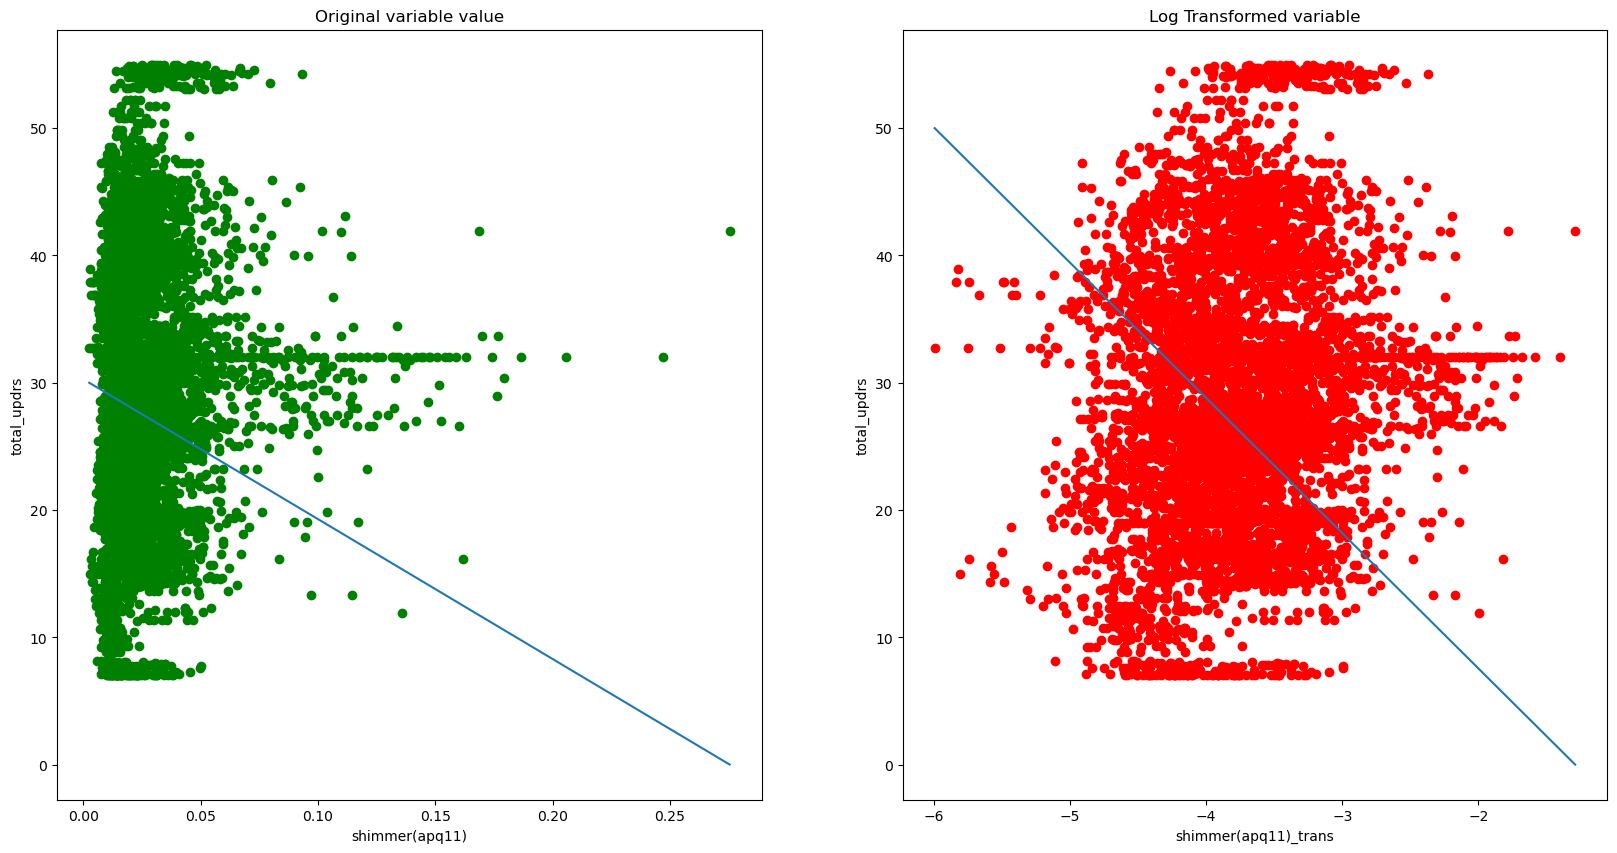

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     6030.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:15   Log-Likelihood:                -15424.
No. Observations:                5875   AIC:                         3.087e+04
Df Residuals:                    5865   BIC:                         3.093e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0326      1.066     -0.968   

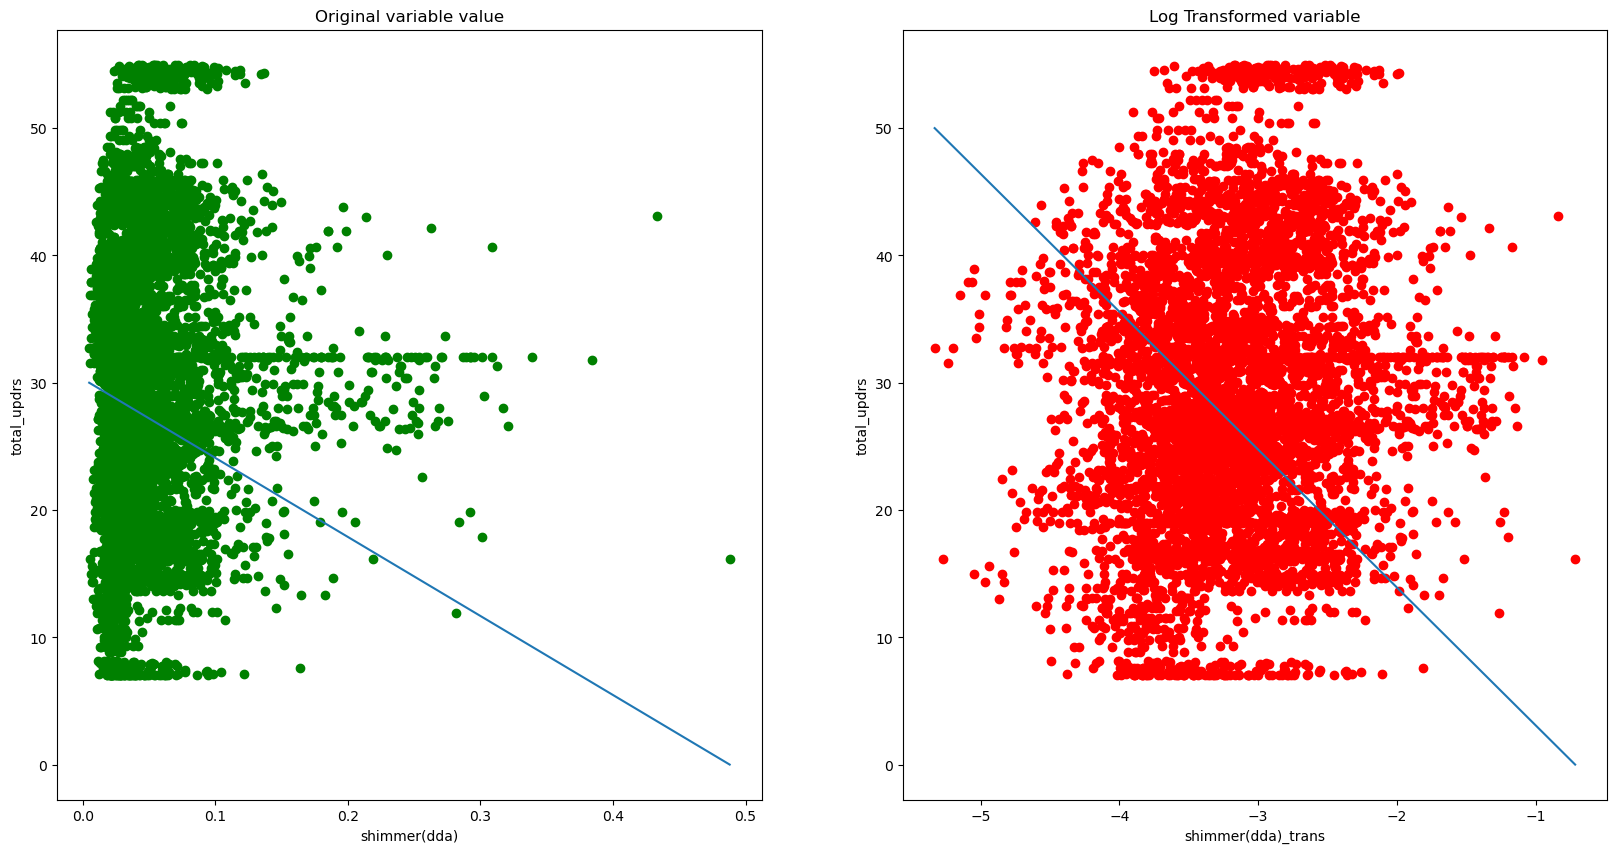

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     6783.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:16   Log-Likelihood:                -15425.
No. Observations:                5875   AIC:                         3.087e+04
Df Residuals:                    5866   BIC:                         3.093e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5813      0.995     -1.588      

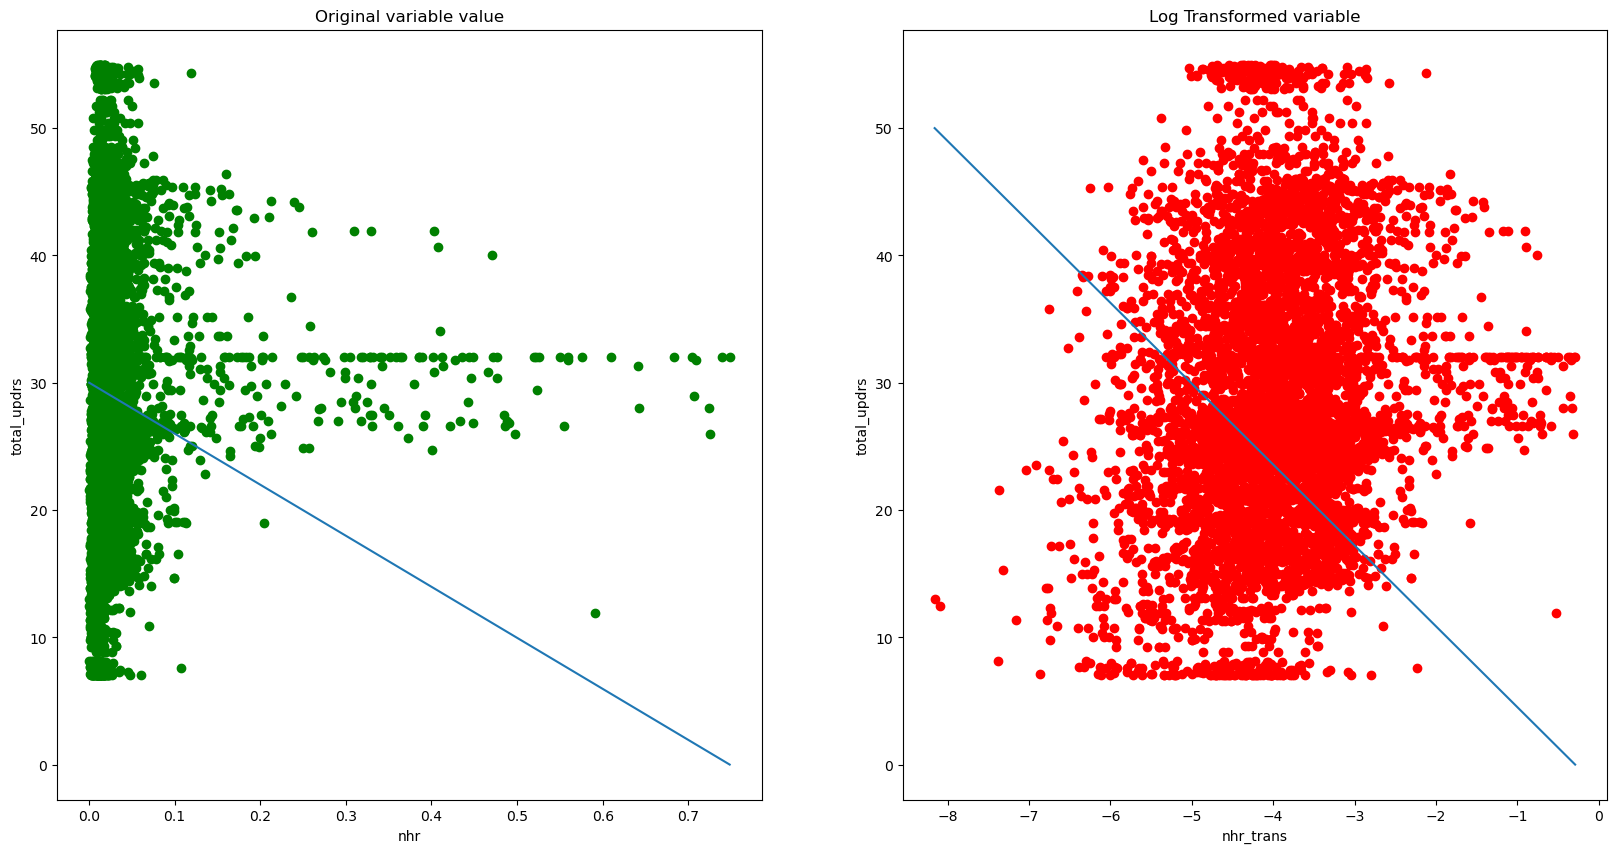

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     7716.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:16   Log-Likelihood:                -15437.
No. Observations:                5875   AIC:                         3.089e+04
Df Residuals:                    5867   BIC:                         3.094e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.0276      0.871     -4.626      

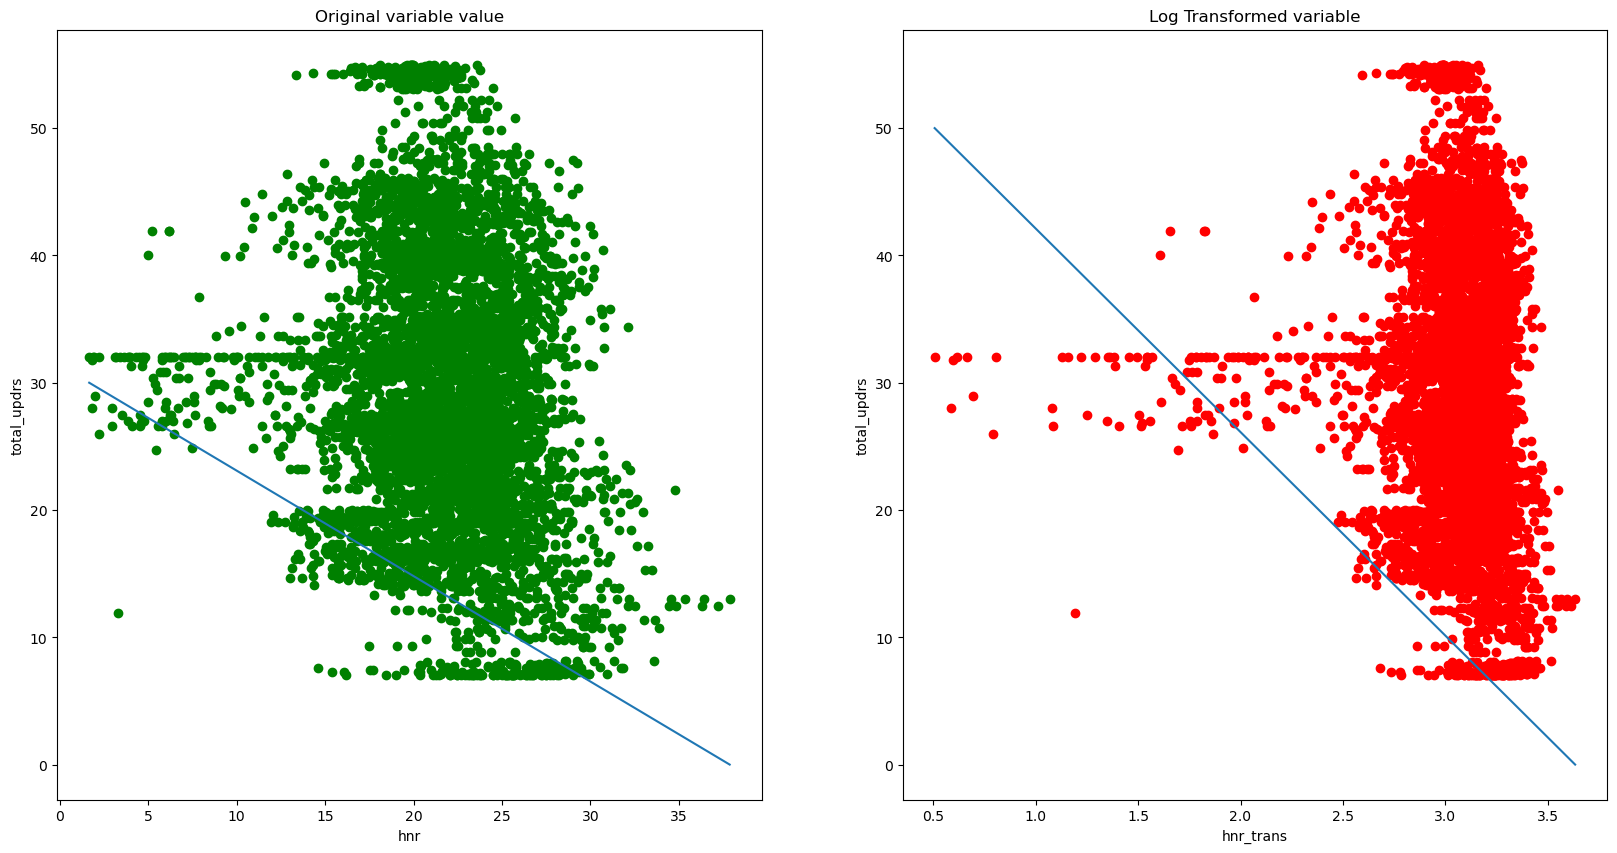

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     9003.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:17   Log-Likelihood:                -15437.
No. Observations:                5875   AIC:                         3.089e+04
Df Residuals:                    5868   BIC:                         3.094e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7737      0.605     -6.238      

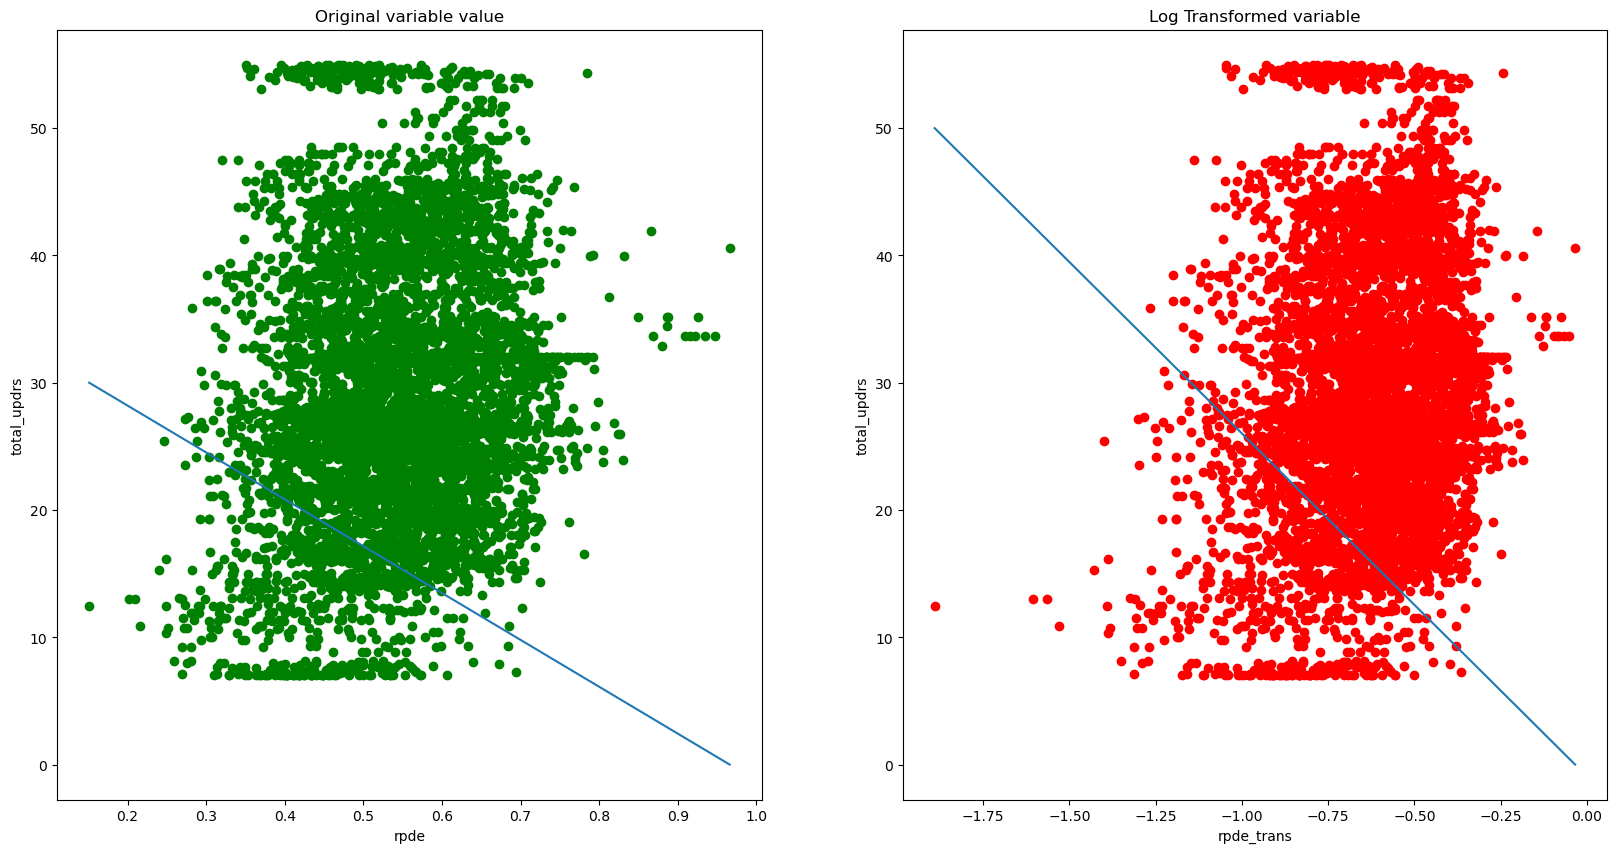

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:18   Log-Likelihood:                -15482.
No. Observations:                5875   AIC:                         3.098e+04
Df Residuals:                    5869   BIC:                         3.102e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7169      0.569     -3.015      

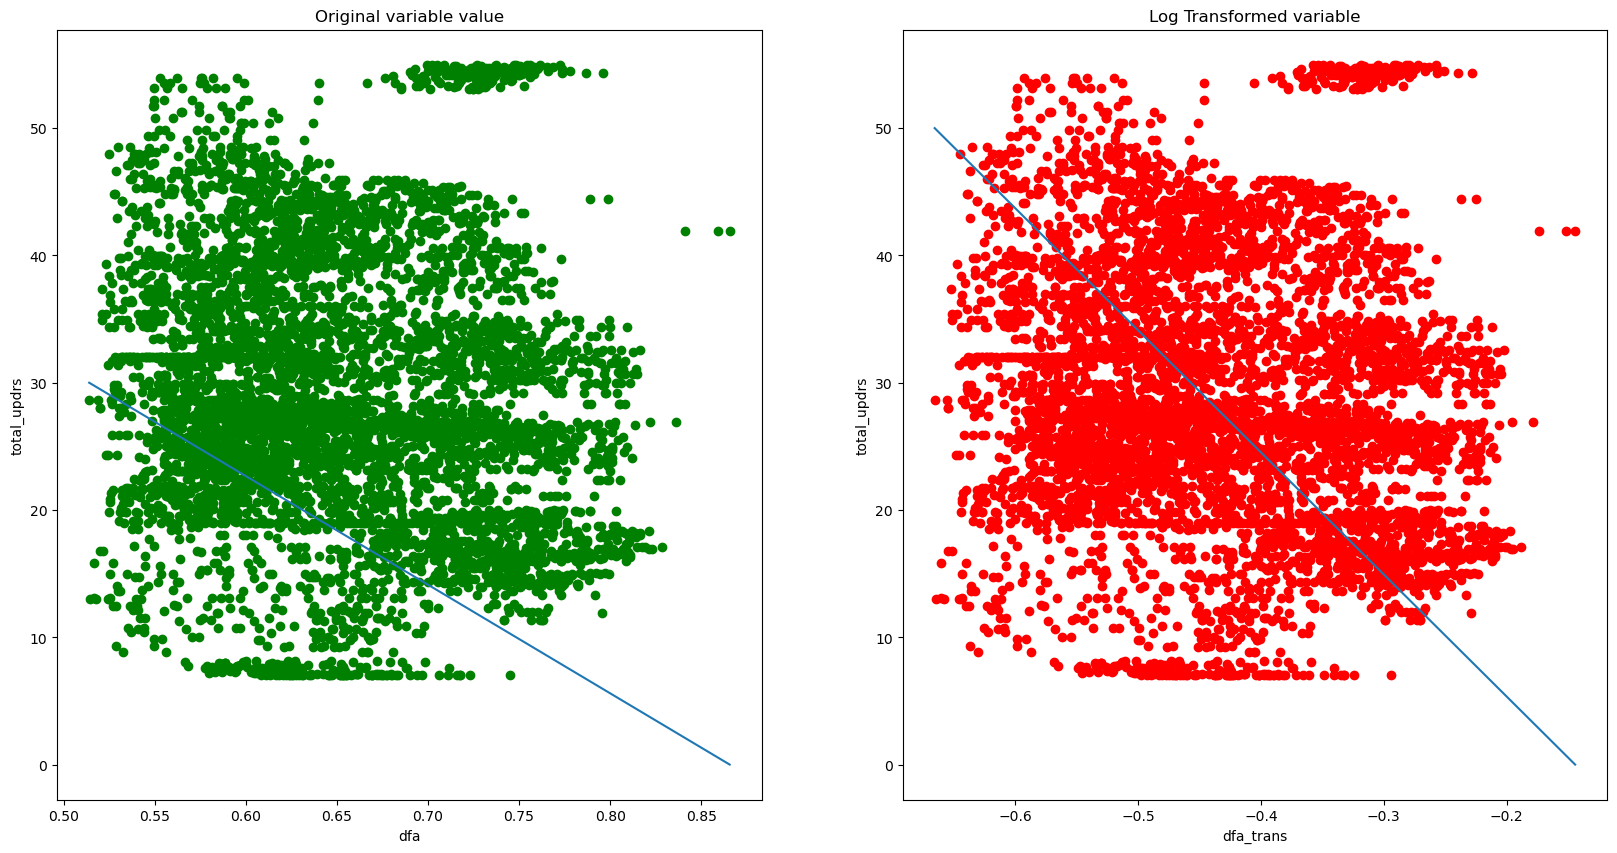

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:18   Log-Likelihood:                -15482.
No. Observations:                5875   AIC:                         3.097e+04
Df Residuals:                    5870   BIC:                         3.101e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7947      0.342     -5.245      

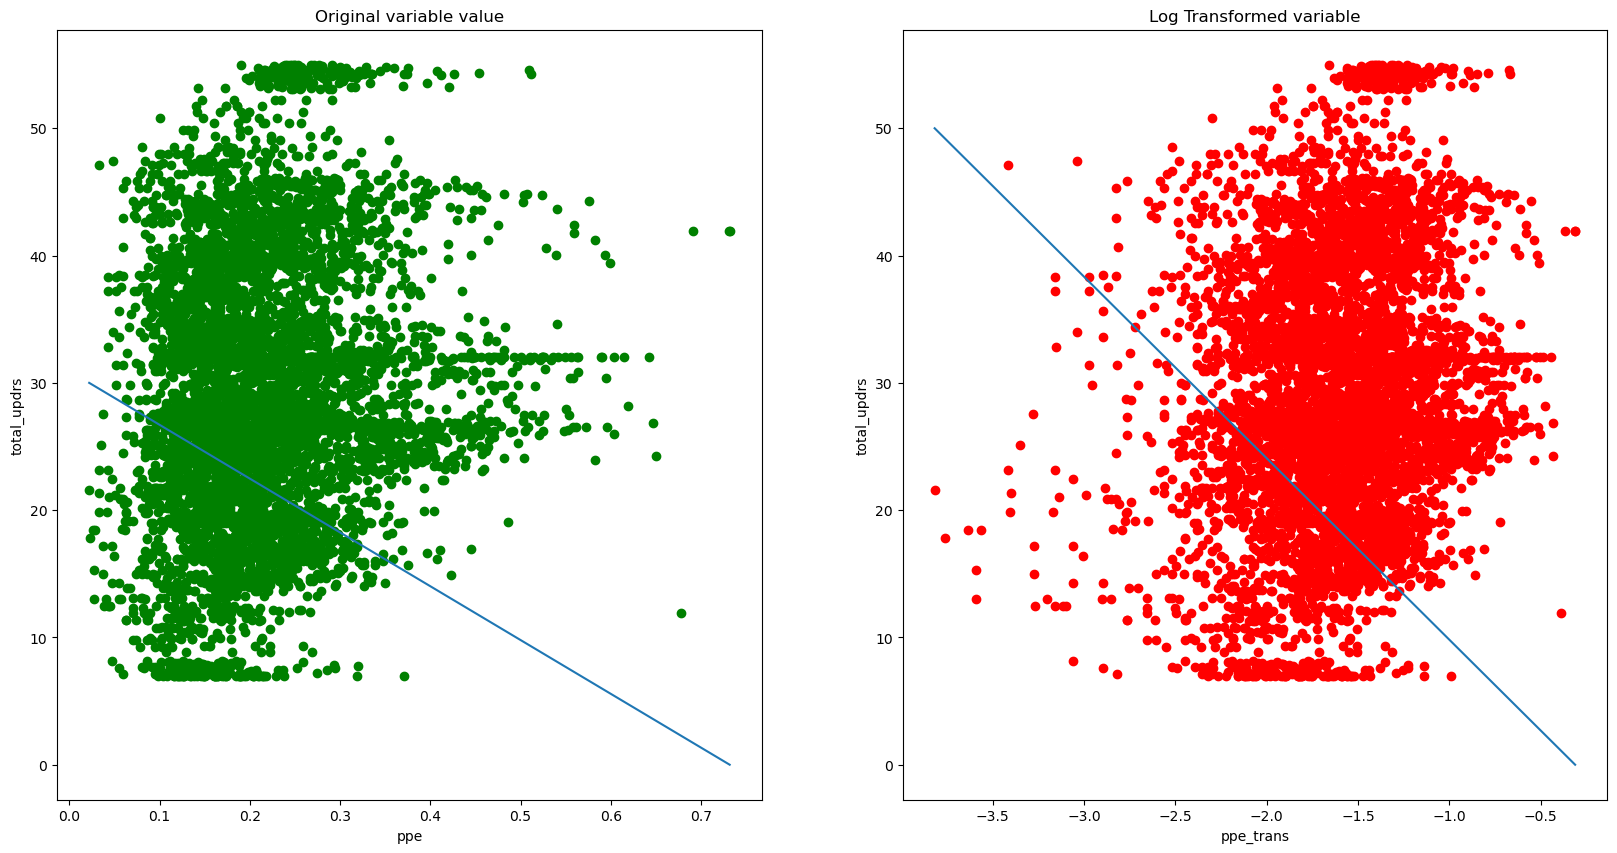

                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:07:19   Log-Likelihood:                -15483.
No. Observations:                5875   AIC:                         3.097e+04
Df Residuals:                    5871   BIC:                         3.100e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8551      0.338     -5.490      

In [1]:
#doing log transformation to improve linearity 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

# Separate explanatory variables (x) from the response variable (y)
df = df[['subject#', 'age', 'sex', 'test_time', 
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe','motor_updrs','total_updrs']]
Y_tupdrs = df.iloc[:, -1] #i.e. it has total_updrs 

# List of columns to transform
columns_to_transform = ['sex', 'test_time', 'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
                        'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
                        'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
                        'dfa', 'ppe']

# Create a new DataFrame to store the transformed columns
transformed_df = df[['motor_updrs', 'total_updrs']]

# Iterate over the columns to perform transformations
for column in columns_to_transform:
    # Create a new column name for the transformed variable
    transcolumnname = column + '_trans'
    
    # Apply log transformation to the specified column and add it to the new DataFrame
    transformed_df[transcolumnname] = df[column].apply(np.log)

    # Visualize the effect of the transformation
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.scatter(df[column], df["total_updrs"], color="green")
    plt.title("Original variable value")
    plt.xlabel(column)
    plt.ylabel("total_updrs")
    plt.plot([df[column].min(), df[column].max()], [30, 0])

    plt.subplot(1, 2, 2)
    plt.scatter(transformed_df[transcolumnname], df["total_updrs"], color="red")
    plt.title("Log Transformed variable")
    plt.xlabel(transcolumnname)
    plt.ylabel("total_updrs")
    plt.plot([transformed_df[transcolumnname].min(), transformed_df[transcolumnname].max()], [50, 0])

    plt.show()

    """
    RE-RUN THE LINEAR REGRESSION MODEL WITH A TRANSFORMED VARIABLE
    """
    # Drop the original column from the DataFrame
    df = df.drop(column, axis=1)

    # Separate explanatory variables (x) from the response variable (y)
    X = df.iloc[:, :-1]
    
    # Build and evaluate the linear regression model
    X = sm.add_constant(X)
    model = sm.OLS(Y_tupdrs, X).fit()
    pred = model.predict(X)
    model_details = model.summary()
    print(model_details)

    print("\nlog transformation of " + column + " done.\n")

# Save the transformed DataFrame to a CSV file
transformed_df.to_csv("PO2_transformed_t.csv", index=False)


HEATMAP AND COLLINEARITY:

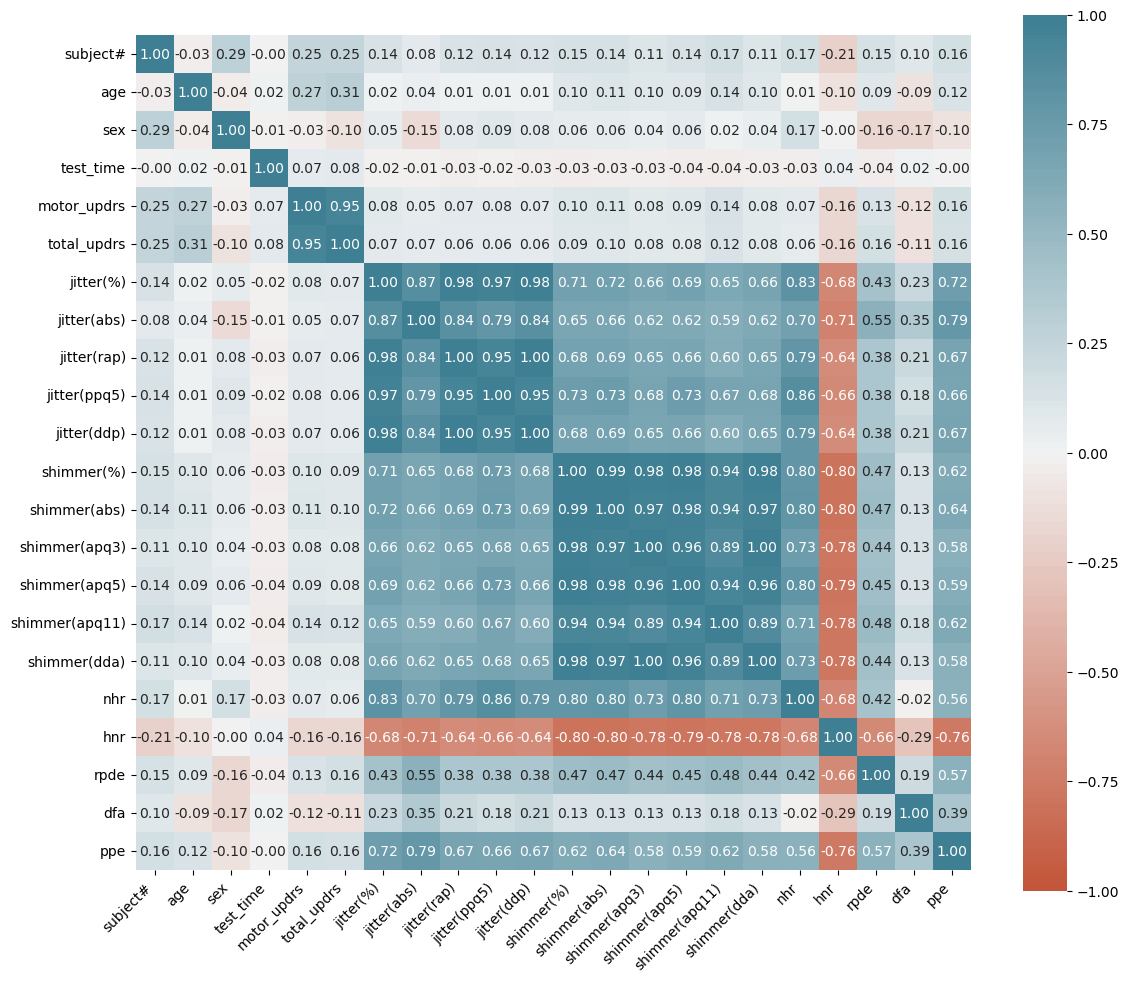

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     81.61
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          1.13e-293
Time:                        09:24:43   Log-Likelihood:                -19924.
No. Observations:                5875   AIC:                         3.989e+04
Df Residuals:                    5854   BIC:                         4.003e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.2913      2.376     11.

In [4]:
#Heatmap and collinearity
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

# Plot correlation matrix
corr = df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Plot the pairwise correlation as heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f"  # Format values with 2 decimal places
)

# Customize the labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Adjust the layout to fit the color bar
plt.tight_layout()

# Save the heatmap with higher resolution
plt.savefig("correlation_heatmap.png", dpi=300)

plt.show()

"""
BUILD AND EVALUATE LINEAR REGRESSION USING STATSMODELS
"""

# Separate explanatory variables (X) from the response variable (y)
df = df[['subject#', 'age', 'sex', 'test_time', 
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe','motor_updrs','total_updrs']]
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

# Build and evaluate the linear regression model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)

"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
WITH COLLINEARITY BEING FIXED
"""

df = df[['subject#', 'age', 'sex', 'test_time', 
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe','motor_updrs','total_updrs']]

# Drop one or more of the correlated variables. Keep only one.
#Dropping jitter(%) due to high correlation with jitter(rap):
df = df.drop(["jitter(%)"], axis=1)
print(df.info())
print("Column names after dropping 'jitter(%)':", df.columns)
# Separate explanatory variables (x) from the response variable (y)
X = df.iloc[:,:-2]
y = df.iloc[:,-2]
# Build and evaluate the linear regression model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)
# no significant result is seen on R-square value while droping jitter(dps)

#dropping shimmer(apq3) as it shows high collinearity with shimmer(dda), also with shimmer(%).

"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
WITH COLLINEARITY BEING FIXED
"""

# Drop one or more of the correlated variables. Keep only one.
df = df.drop(["shimmer(apq3)"], axis=1)
print(df.info())

# Separate explanatory variables (x) from the response variable (y)
X = df.drop(['motor_updrs','total_updrs'], axis = 1)
Y_mupdrs = df[['motor_updrs']]

# Build and evaluate the linear regression model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_mupdrs,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)



In [13]:
#TASK 4 
#standarized and gaussian transformation starting

#standarized transformation for motor Updrs
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("po2_data.csv")
X = df.drop(['motor_updrs','total_updrs'], axis = 1)
Y_mupdrs = df[['motor_updrs']]
# Build and evaluate the linear regression model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_mupdrs,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)
#Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#drop the constant from the dataframe
X = X.drop(["const"],axis = 1)
std_X = scaler.fit_transform(X.values)
std_X_df = pd.DataFrame(std_X, index = X.index, columns = X.columns)
#rebuild the linear regression
# Build and evaluate the linear regression model
import statsmodels.api as sm
std_X_df = sm.add_constant(std_X_df)
model = sm.OLS(Y_mupdrs,std_X_df).fit()
pred = model.predict(std_X_df)
model_details = model.summary()
print(model_details)

#standardization transformation for total updrs
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("po2_data.csv")
X = df.drop(['motor_updrs','total_updrs'], axis = 1)
Y_tupdrs = df[['total_updrs']]
# Build and evaluate the linear regression model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_tupdrs,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)
#Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#drop the constant from the dataframe
X = X.drop(["const"],axis = 1)
std_X = scaler.fit_transform(X.values)
std_X_df = pd.DataFrame(std_X, index = X.index, columns = X.columns)
#rebuild the linear regression
# Build and evaluate the linear regression model
import statsmodels.api as sm
std_X_df = sm.add_constant(std_X_df)
model = sm.OLS(Y_tupdrs,std_X_df).fit()
pred = model.predict(std_X_df)
model_details = model.summary()
print(model_details)

#Gaussian Transformation for motor updrs
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("po2_data.csv")
X = df.drop(['motor_updrs','total_updrs'], axis = 1)
Y_mupdrs = df[['motor_updrs']]
from sklearn.preprocessing import PowerTransformer
# Build and evaluate the linear regression model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_mupdrs,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)
#Gaussian Transformation
#drop the constant from the dataframe
X = X.drop(["const"],axis = 1)
#create the Power Transformation
transformer = PowerTransformer()
# Apply the transformer to make all explanatory variables more Gaussian-looking
trans_X = transformer.fit_transform(X.values)
# repackage the values as a dataset
df_trans = pd.DataFrame(trans_X, index=X.index, columns=X.columns)
"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""
# Build and evaluate the linear regression model
df_trans = sm.add_constant(df_trans)
model = sm.OLS(Y_mupdrs,df_trans).fit()
pred = model.predict(df_trans)
model_details = model.summary()
print(model_details)


#guassian transformation for total updrs
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("po2_data.csv")
X = df.drop(['motor_updrs','total_updrs'], axis = 1)
Y_tupdrs = df[['total_updrs']]
from sklearn.preprocessing import PowerTransformer
# Build and evaluate the linear regression model
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_tupdrs,X).fit()
pred = model.predict(X)
model_details = model.summary()
print(model_details)
#Gaussian Transformation
#drop the constant from the dataframe
X = X.drop(["const"],axis = 1)
#create the Power Transformation
transformer = PowerTransformer()
# Apply the transformer to make all explanatory variables more Gaussian-looking
trans_X = transformer.fit_transform(X.values)
# repackage the values as a dataset
df_trans = pd.DataFrame(trans_X, index=X.index, columns=X.columns)
"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""
# Build and evaluate the linear regression model
df_trans = sm.add_constant(df_trans)
model = sm.OLS(Y_tupdrs,df_trans).fit()
pred = model.predict(df_trans)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     81.61
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.13e-293
Time:                        15:51:17   Log-Likelihood:                -19924.
No. Observations:                5875   AIC:                         3.989e+04
Df Residuals:                    5854   BIC:                         4.003e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             27.2913      2.376     11.